<a href="https://colab.research.google.com/github/diogoruivo47/Data-Mining/blob/chiel/FS_Dimension_reductionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

remove outliers before normalization


Have you missed some outliers?
Are there still missing values?
Is the data normalized?

In [1]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap


df = pd.read_csv('num_UMAP_df.csv')
df2 = pd.read_csv('cat_UMAP_df.csv')

In [3]:
df

Unnamed: 0  customer_age  vendor_count  product_count  is_chain  \
0               0            18             2              5         1   
1               1            17             2              2         2   
2               2            38             1              2         2   
3               3            27             2              3         1   
4               4            20             2              5         0   
...           ...           ...           ...            ...       ...   
31870       31883            30             1              1         1   
31871       31884            27             1              1         0   
31872       31885            24             1              1         1   
31873       31886            34             1              1         0   
31874       31887            30             1              1         0   

       first_order  last_order  CUI_American  CUI_Asian  CUI_Beverages  ...  \
0                0           1          0.00       0.00           0.00  ...   
1                0           1         12.82       6.39           0.00  ...   
2                0           1          9.20       0.00           0.00  ...   
3                0           2          0.00      13.70           0.00  ...   
4                0           2         14.57      40.87           0.00  ...   
...            ...         ...           ...        ...            ...  ...   
31870           91          91          0.00       0.00          18.04  ...   
31871           91          91         18.04       0.00           0.00  ...   
31872           91          91          0.00       0.00           0.00  ...   
31873           91          91          0.00      12.03           0.00  ...   
31874           91          91          0.00       0.00           0.00  ...   

       Recency_Score  Frequency_Score  Monetary_Score  CLV_Score  \
0           0.010989         0.250000        0.020362   0.092846   
1           0.010989         0.250000        0.013544   0.090596   
2           0.010989         0.250000        0.006487   0.088267   
3           0.011111         0.166667        0.022252   0.066010   
4           0.011111         0.166667        0.039088   0.071566   
...              ...              ...             ...        ...   
31870       1.000000         0.250000        0.012719   0.416697   
31871       1.000000         0.250000        0.012719   0.416697   
31872       1.000000         0.250000        0.012543   0.416639   
31873       1.000000         0.250000        0.008482   0.415299   
31874       1.000000         0.250000        0.005577   0.414340   

       Orders_Night  Orders_Dawn  Orders_Morning  Orders_Afternoon  \
0                 0            0               0                 0   
1                 0            0               2                 0   
2                 0            0               2                 0   
3                 0            0               1                 1   
4                 0            0               2                 0   
...             ...          ...             ...               ...   
31870             0            0               0                 1   
31871             0            0               0                 0   
31872             0            1               0                 0   
31873             0            0               1                 0   
31874             0            0               0                 0   

       Orders_Evening  Orders_Dusk  
0                   2            0  
1                   0            0  
2                   0            0  
3                   0            0  
4                   0            0  
...               ...          ...  
31870               0            0  
31871               1            0  
31872               0            0  
31873               0            0  
31874               1            0  

[31875 rows x 72 columns]

In [4]:
# df_normalized = df_normalized.drop(columns=['Unnamed: 0'])


# dropping HR 0-23 for grouped columns for time of day,

# first & last order are taken in recency column so dropped

# By order percentage:

# High (>30%): Asian, American
# Medium (10-30%): OTHER, Italian, Japanese
# Low (<10%): remaining cuisines

# By Customer Lifetime Value (CLV) Score:

# High CLV (0.3-0.5)
# Medium CLV (0.2-0.3)
# Low CLV (0.0-0.2)

# By Age Group:

# <18
# 18-24
# 25-34
# 35-44
# 45-54
# 55+

# By Loyalty Rank:

# High (4.0 - 8.0)
# Medium (2.0 - 4.0)
# Low (0.0 - 2.0)

import pandas as pd

# Assuming df is your original DataFrame
df_copy = df.copy()

# Define columns to drop
columns_to_drop = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
                   'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14',
                   'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
                   'HR_22', 'HR_23', 'first_order', 'last_order', 'customer_age']

# # CLV Score
# df['CLV_Group'] = pd.cut(df['CLV_Score'], bins=[0, 0.2, 0.3, 0.5], labels=['Low', 'Medium', 'High'])


# # Loyalty Rank
# df['Loyalty_Group'] = pd.cut(df['Loyalty_Rank'], bins=[0, 2, 4, 8], labels=['Low', 'Medium', 'High'])

# , 'CUI_Asian', 'CUI_American', 'CUI_OTHER', 'CUI_Italian', 'CUI_Japanese', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
                    #  'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
                    #  'CUI_Street_Food/Snacks', 'CUI_Thai'

# # Define cuisine groups
# high_freq_cuisines = ['CUI_Asian', 'CUI_American']
# medium_freq_cuisines = ['CUI_OTHER', 'CUI_Italian', 'CUI_Japanese']
# low_freq_cuisines = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
#                      'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
#                      'CUI_Street_Food/Snacks', 'CUI_Thai']

# # Create Age Group column
df_copy['Age_Group'] = pd.cut(df_copy['customer_age'], bins=[0, 18, 24, 34, 44, 54, 100], labels=['<18', '18-24', '25-34', '35-44', '45-54', '55+'])

# # Create a new column 'cuisine_group'
# def assign_cuisine_group(row):
#     if any(row[col] == 1 for col in high_freq_cuisines):
#         return '1'
#     elif any(row[col] == 1 for col in medium_freq_cuisines):
#         return '2'
#     else:
#         return '3'

# df_copy['cuisine_group'] = df_copy.apply(assign_cuisine_group, axis=1)

# Drop the specified columns
df_grouped = df_copy.drop(columns=columns_to_drop)

df_grouped

Unnamed: 0  vendor_count  product_count  is_chain  CUI_American  \
0               0             2              5         1          0.00   
1               1             2              2         2         12.82   
2               2             1              2         2          9.20   
3               3             2              3         1          0.00   
4               4             2              5         0         14.57   
...           ...           ...            ...       ...           ...   
31870       31883             1              1         1          0.00   
31871       31884             1              1         0         18.04   
31872       31885             1              1         1          0.00   
31873       31886             1              1         0          0.00   
31874       31887             1              1         0          0.00   

       CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken_Dishes  CUI_Chinese  \
0           0.00           0.00       0.0                 0.0          0.0   
1           6.39           0.00       0.0                 0.0          0.0   
2           0.00           0.00       0.0                 0.0          0.0   
3          13.70           0.00       0.0                 0.0          0.0   
4          40.87           0.00       0.0                 0.0          0.0   
...          ...            ...       ...                 ...          ...   
31870       0.00          18.04       0.0                 0.0          0.0   
31871       0.00           0.00       0.0                 0.0          0.0   
31872       0.00           0.00       0.0                 0.0          0.0   
31873      12.03           0.00       0.0                 0.0          0.0   
31874       0.00           0.00       0.0                 0.0          0.0   

       ...  Frequency_Score  Monetary_Score  CLV_Score  Orders_Night  \
0      ...         0.250000        0.020362   0.092846             0   
1      ...         0.250000        0.013544   0.090596             0   
2      ...         0.250000        0.006487   0.088267             0   
3      ...         0.166667        0.022252   0.066010             0   
4      ...         0.166667        0.039088   0.071566             0   
...    ...              ...             ...        ...           ...   
31870  ...         0.250000        0.012719   0.416697             0   
31871  ...         0.250000        0.012719   0.416697             0   
31872  ...         0.250000        0.012543   0.416639             0   
31873  ...         0.250000        0.008482   0.415299             0   
31874  ...         0.250000        0.005577   0.414340             0   

       Orders_Dawn  Orders_Morning  Orders_Afternoon  Orders_Evening  \
0                0               0                 0               2   
1                0               2                 0               0   
2                0               2                 0               0   
3                0               1                 1               0   
4                0               2                 0               0   
...            ...             ...               ...             ...   
31870            0               0                 1               0   
31871            0               0                 0               1   
31872            1               0                 0               0   
31873            0               1                 0               0   
31874            0               0                 0               1   

       Orders_Dusk  Age_Group  
0                0        <18  
1                0        <18  
2                0      35-44  
3                0      25-34  
4                0      18-24  
...            ...        ...  
31870            0      25-34  
31871            0      25-34  
31872            0      18-24  
31873            0      25-34  
31874            0      25-34  

[31875 rows x 46 columns]

In [5]:

# By Customer Region (Order %):

# Regions: 8670, 4660, 2360
# Order % Range: 27.7% to 30.62%

# Regions: 2440, 4140, 8370, 8550
# Order % Range: 0,04 to 4.65%

# Define the regions (as strings)
main_regions = ['8670', '4660', '2360']
other_regions = ['2440', '4140', '8370', '8550']

# Create new columns for main regions
for region in main_regions:
    df2[f'Region_{region}'] = (df2['customer_region'] == region).astype(int)

# Create a single column for other regions
df2['Region_Other'] = (df2['customer_region'].isin(other_regions)).astype(int)

# If the customer_region contains a string like 'Region_8670',
# extract the numeric part:
df2['Region_Numeric'] = df2['customer_region'].str.extract('(\d+)')

# Now use the numeric region for comparison
for region in main_regions:
    df2[f'Region_{region}'] = (df2['Region_Numeric'] == region).astype(int)

df2['Region_Other'] = (df2['Region_Numeric'].isin(other_regions)).astype(int)

# Drop temporary and original columns
cat_df_grouped = df2.drop(columns=['customer_region', 'Region_Numeric'])

cat_df_grouped.head()

Unnamed: 0 last_promo payment_method  Region_8670  Region_4660  \
0           0   DELIVERY           DIGI            0            0   
1           1   DISCOUNT           DIGI            1            0   
2           2   DISCOUNT           CASH            0            1   
3           3   DELIVERY           DIGI            0            1   
4           4          -           DIGI            0            1   

   Region_2360  Region_Other  
0            1             0  
1            0             0  
2            0             0  
3            0             0  
4            0             0

In [6]:
# Merge the two DataFrames on 'Unnamed: 0'
merged_df = pd.merge(df_grouped, cat_df_grouped, on='Unnamed: 0', how='inner')

# Print the merged DataFrame
merged_df

Unnamed: 0  vendor_count  product_count  is_chain  CUI_American  \
0               0             2              5         1          0.00   
1               1             2              2         2         12.82   
2               2             1              2         2          9.20   
3               3             2              3         1          0.00   
4               4             2              5         0         14.57   
...           ...           ...            ...       ...           ...   
31870       31883             1              1         1          0.00   
31871       31884             1              1         0         18.04   
31872       31885             1              1         1          0.00   
31873       31886             1              1         0          0.00   
31874       31887             1              1         0          0.00   

       CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken_Dishes  CUI_Chinese  \
0           0.00           0.00       0.0                 0.0          0.0   
1           6.39           0.00       0.0                 0.0          0.0   
2           0.00           0.00       0.0                 0.0          0.0   
3          13.70           0.00       0.0                 0.0          0.0   
4          40.87           0.00       0.0                 0.0          0.0   
...          ...            ...       ...                 ...          ...   
31870       0.00          18.04       0.0                 0.0          0.0   
31871       0.00           0.00       0.0                 0.0          0.0   
31872       0.00           0.00       0.0                 0.0          0.0   
31873      12.03           0.00       0.0                 0.0          0.0   
31874       0.00           0.00       0.0                 0.0          0.0   

       ...  Orders_Afternoon  Orders_Evening  Orders_Dusk  Age_Group  \
0      ...                 0               2            0        <18   
1      ...                 0               0            0        <18   
2      ...                 0               0            0      35-44   
3      ...                 1               0            0      25-34   
4      ...                 0               0            0      18-24   
...    ...               ...             ...          ...        ...   
31870  ...                 1               0            0      25-34   
31871  ...                 0               1            0      25-34   
31872  ...                 0               0            0      18-24   
31873  ...                 0               0            0      25-34   
31874  ...                 0               1            0      25-34   

       last_promo  payment_method  Region_8670  Region_4660  Region_2360  \
0        DELIVERY            DIGI            0            0            1   
1        DISCOUNT            DIGI            1            0            0   
2        DISCOUNT            CASH            0            1            0   
3        DELIVERY            DIGI            0            1            0   
4               -            DIGI            0            1            0   
...           ...             ...          ...          ...          ...   
31870     FREEBIE            DIGI            1            0            0   
31871    DELIVERY            DIGI            1            0            0   
31872           -            DIGI            1            0            0   
31873    DISCOUNT            DIGI            1            0            0   
31874           -            CASH            0            1            0   

       Region_Other  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
31870             0  
31871             0  
31872             0  
31873             0  
31874             0  

[31875 rows x 52 columns]

In [7]:
for col in ['Age_Group', 'last_promo', 'payment_method']:
  print(f"Unique values for {col}: {merged_df[col].unique()}")

Unique values for Age_Group: ['<18', '35-44', '25-34', '18-24', '45-54', '55+']
Categories (6, object): ['<18' < '18-24' < '25-34' < '35-44' < '45-54' < '55+']
Unique values for last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
Unique values for payment_method: ['DIGI' 'CASH' 'CARD']


In [8]:
import pandas as pd

# Assuming encoded_df is your DataFrame
encoded_df = pd.get_dummies(merged_df,
                            columns=['payment_method', 'Age_Group',
                                     'Age_Group', 'last_promo'])
# Specify all columns to one-hot encode

encoded_df = encoded_df.drop(columns=['Unnamed: 0'])

In [9]:
age_group_mapping = {
    '<18': 0,
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55+': 5
}

last_promo_mapping = {
    '-': 0,
    'DELIVERY': 1,
    'DISCOUNT': 2,
    'FREEBIE': 3
}

payment_method_mapping = {
    'CASH': 0,
    'CARD': 1,
    'DIGI': 2
}

def encode_categories(df):
    """
    Encode categorical variables and transform specific columns in the dataframe

    Parameters:
    df (pandas.DataFrame): Input DataFrame

    Returns:
    pandas.DataFrame: Transformed DataFrame
    """
    df_encoded = df.copy()

    # Encode age group and last promo
    columns_to_encode = {
        'Age_Group': age_group_mapping,
        'last_promo': last_promo_mapping
    }

    for col, mapping in columns_to_encode.items():
        if col in df.columns:
            df_encoded[col] = pd.to_numeric(df_encoded[col].map(mapping))

    # Create binary columns for payment method
    if 'payment_method' in df.columns:
        for method in payment_method_mapping.keys():
            df_encoded[f'payment_method_{method}'] = (df_encoded['payment_method'] == method).astype(int)
        df_encoded.drop('payment_method', axis=1, inplace=True)

    # Handle CUI columns
    cui_columns = [col for col in df.columns if col.startswith('CUI_')]
    if cui_columns:
        df_encoded['CUI_other'] = df_encoded[cui_columns].sum(axis=1)
        df_encoded.drop(cui_columns, axis=1, inplace=True)

    # Drop specified columns
    columns_to_drop = ['Frequency_Score', 'Monetary_Score']
    df_encoded.drop(columns_to_drop, axis=1, errors='ignore', inplace=True)

    return df_encoded

# Example usage:
df_encoded = encode_categories(merged_df)

In [10]:


    # # Combine RFM scores
    # rfm_cols = ['Recency_Score', 'Frequency_Score', 'Monetary_Score']
    # if all(col in df.columns for col in rfm_cols):
    #     df_transformed['RFM_Score'] = df_transformed[rfm_cols].mean(axis=1)
    #     df_transformed.drop(rfm_cols, axis=1, inplace=True)



In [11]:
pd.set_option('display.max_columns', None)
df_encoded

Unnamed: 0  vendor_count  product_count  is_chain  DOW_0  DOW_1  DOW_2  \
0               0             2              5         1      1      0      0   
1               1             2              2         2      1      0      0   
2               2             1              2         2      1      0      0   
3               3             2              3         1      0      1      0   
4               4             2              5         0      0      1      0   
...           ...           ...            ...       ...    ...    ...    ...   
31870       31883             1              1         1      0      0      0   
31871       31884             1              1         0      0      0      0   
31872       31885             1              1         1      0      0      0   
31873       31886             1              1         0      0      0      0   
31874       31887             1              1         0      0      0      0   

       DOW_3  DOW_4  DOW_5  DOW_6  Total_Orders_Per_Client    mnt  \
0          0      0      0      1                        2  28.88   
1          0      0      0      1                        2  19.21   
2          0      0      0      1                        2   9.20   
3          0      0      0      1                        2  31.56   
4          0      0      0      1                        2  55.44   
...      ...    ...    ...    ...                      ...    ...   
31870      0      0      0      1                        1  18.04   
31871      0      0      0      1                        1  18.04   
31872      0      0      0      1                        1  17.79   
31873      0      0      0      1                        1  12.03   
31874      0      0      0      1                        1   7.91   

       mnt_Per_Order  Items_Per_Order       frq  rcn  activity  Loyalty  \
0              14.44              2.5  1.000000   90         2      0.0   
1               9.60              1.0  1.000000   90         2      0.0   
2               4.60              1.0  1.000000   90         2      0.5   
3              15.78              1.5  0.666667   89         3      0.0   
4              27.72              2.5  0.666667   89         3      0.0   
...              ...              ...       ...  ...       ...      ...   
31870          18.04              1.0  1.000000    0         1      0.0   
31871          18.04              1.0  1.000000    0         1      0.0   
31872          17.79              1.0  1.000000    0         1      0.0   
31873          12.03              1.0  1.000000    0         1      0.0   
31874           7.91              1.0  1.000000    0         1      0.0   

       Recency_Score  CLV_Score  Orders_Night  Orders_Dawn  Orders_Morning  \
0           0.010989   0.092846             0            0               0   
1           0.010989   0.090596             0            0               2   
2           0.010989   0.088267             0            0               2   
3           0.011111   0.066010             0            0               1   
4           0.011111   0.071566             0            0               2   
...              ...        ...           ...          ...             ...   
31870       1.000000   0.416697             0            0               0   
31871       1.000000   0.416697             0            0               0   
31872       1.000000   0.416639             0            1               0   
31873       1.000000   0.415299             0            0               1   
31874       1.000000   0.414340             0            0               0   

       Orders_Afternoon  Orders_Evening  Orders_Dusk  Age_Group  last_promo  \
0                     0               2            0          0           1   
1                     0               0            0          0           2   
2                     0               0            0          3           2   
3                     1               0            

In [12]:
def encode_categories(df):
    df_encoded = df.copy()
    columns_to_encode = {
        'Age_Group': age_group_mapping,
        'last_promo': last_promo_mapping,
    }

    for col, mapping in columns_to_encode.items():
        if col in df.columns:
            df_encoded[col] = pd.to_numeric(df_encoded[col].map(mapping))

    return df_encoded

In [13]:
def preprocess_data(df):
   df_numeric = df.select_dtypes(include='number')

   # 1. Median Imputation
   imputer = SimpleImputer(strategy='median')
   df_imputed = pd.DataFrame(
       imputer.fit_transform(df_numeric),
       columns=df_numeric.columns
   )

   # 2. Handle outliers column by column
   df_clean = df_imputed.copy()
   for column in df_clean.columns:
       Q1 = df_clean[column].quantile(0.25)
       Q3 = df_clean[column].quantile(0.75)
       IQR = Q3 - Q1
       df_clean[column] = df_clean[column].clip(
           lower=Q1 - 3 * IQR,
           upper=Q3 + 3 * IQR
       )

   # 3. Min-Max Scaling instead of StandardScaler
   from sklearn.preprocessing import MinMaxScaler
   scaler = MinMaxScaler()
   df_scaled = pd.DataFrame(
       scaler.fit_transform(df_clean),
       columns=df_numeric.columns
   )

   return df_scaled

# Usage
df_scaled = preprocess_data(df_encoded)

In [14]:
print(df_encoded['Age_Group'].dtype)

int64


In [15]:
df_encoded

Unnamed: 0  vendor_count  product_count  is_chain  DOW_0  DOW_1  DOW_2  \
0               0             2              5         1      1      0      0   
1               1             2              2         2      1      0      0   
2               2             1              2         2      1      0      0   
3               3             2              3         1      0      1      0   
4               4             2              5         0      0      1      0   
...           ...           ...            ...       ...    ...    ...    ...   
31870       31883             1              1         1      0      0      0   
31871       31884             1              1         0      0      0      0   
31872       31885             1              1         1      0      0      0   
31873       31886             1              1         0      0      0      0   
31874       31887             1              1         0      0      0      0   

       DOW_3  DOW_4  DOW_5  DOW_6  Total_Orders_Per_Client    mnt  \
0          0      0      0      1                        2  28.88   
1          0      0      0      1                        2  19.21   
2          0      0      0      1                        2   9.20   
3          0      0      0      1                        2  31.56   
4          0      0      0      1                        2  55.44   
...      ...    ...    ...    ...                      ...    ...   
31870      0      0      0      1                        1  18.04   
31871      0      0      0      1                        1  18.04   
31872      0      0      0      1                        1  17.79   
31873      0      0      0      1                        1  12.03   
31874      0      0      0      1                        1   7.91   

       mnt_Per_Order  Items_Per_Order       frq  rcn  activity  Loyalty  \
0              14.44              2.5  1.000000   90         2      0.0   
1               9.60              1.0  1.000000   90         2      0.0   
2               4.60              1.0  1.000000   90         2      0.5   
3              15.78              1.5  0.666667   89         3      0.0   
4              27.72              2.5  0.666667   89         3      0.0   
...              ...              ...       ...  ...       ...      ...   
31870          18.04              1.0  1.000000    0         1      0.0   
31871          18.04              1.0  1.000000    0         1      0.0   
31872          17.79              1.0  1.000000    0         1      0.0   
31873          12.03              1.0  1.000000    0         1      0.0   
31874           7.91              1.0  1.000000    0         1      0.0   

       Recency_Score  CLV_Score  Orders_Night  Orders_Dawn  Orders_Morning  \
0           0.010989   0.092846             0            0               0   
1           0.010989   0.090596             0            0               2   
2           0.010989   0.088267             0            0               2   
3           0.011111   0.066010             0            0               1   
4           0.011111   0.071566             0            0               2   
...              ...        ...           ...          ...             ...   
31870       1.000000   0.416697             0            0               0   
31871       1.000000   0.416697             0            0               0   
31872       1.000000   0.416639             0            1               0   
31873       1.000000   0.415299             0            0               1   
31874       1.000000   0.414340             0            0               0   

       Orders_Afternoon  Orders_Evening  Orders_Dusk  Age_Group  last_promo  \
0                     0               2            0          0           1   
1                     0               0            0          0           2   
2                     0               0            0          3           2   
3                     1               0            

In [16]:
df_scaled.describe()

Unnamed: 0  vendor_count  product_count      is_chain         DOW_0  \
count  31875.000000  31875.000000   31875.000000  31875.000000  31875.000000   
mean       0.499909      0.234616       0.241442      0.276005      0.133075   
std        0.288663      0.191039       0.228833      0.276324      0.220615   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.249961      0.076923       0.090909      0.111111      0.000000   
50%        0.499859      0.153846       0.136364      0.222222      0.000000   
75%        0.749820      0.307692       0.318182      0.333333      0.250000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

              DOW_1         DOW_2         DOW_3         DOW_4         DOW_5  \
count  31875.000000  31875.000000  31875.000000  31875.000000  31875.000000   
mean       0.135467      0.141412      0.148024      0.162471      0.156729   
std        0.223833      0.227088      0.230988      0.235944      0.232473   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.250000      0.250000      0.250000      0.250000      0.250000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              DOW_6  Total_Orders_Per_Client           mnt  mnt_Per_Order  \
count  31875.000000             31875.000000  31875.000000   31875.000000   
mean       0.166698                 0.286913      0.252917       0.272216   
std        0.245105                 0.246595      0.237966       0.198407   
min        0.000000                 0.000000      0.000000       0.000000   
25%        0.000000                 0.142857      0.091192       0.131015   
50%        0.000000                 0.214286      0.170915       0.218359   
75%        0.250000                 0.357143      0.318394       0.348261   
max        1.000000                 1.000000      1.000000       1.000000   

       Items_Per_Order           frq           rcn      activity  \
count     31875.000000  31875.000000  31875.000000  31875.000000   
mean          0.431374      0.162490      0.300278      0.392190   
std           0.130870      0.189256      0.255422      0.327082   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.333333      0.035461      0.088889      0.033333   
50%           0.388889      0.061466      0.222222      0.377778   
75%           0.500000      0.276596      0.466667      0.688889   
max           1.000000      1.000000      1.000000      1.000000   

            Loyalty  Recency_Score     CLV_Score  Orders_Night  Orders_Dawn  \
count  31875.000000   31875.000000  31875.000000       31875.0      31875.0   
mean       0.165518       0.203922      0.227106           0.0          0.0   
std        0.235599       0.241453      0.154505           0.0          0.0   
min        0.000000       0.000000      0.000000           0.0          0.0   
25%        0.000000       0.033729      0.097724           0.0          0.0   
50%        0.000000       0.100718      0.188310           0.0          0.0   
75%        0.342466       0.275297      0.323293           0.0          0.0   
max        1.000000       1.000000      1.000000           0.0          0.0   

       Orders_Morning  Orders_Afternoon  Orders_Evening  Orders_Dusk  \
count    31875.000000      31875.000000    31875.000000      31875.0   
mean         0.221459          0.224361        0.155180          0.0   
std          0.303454          0.297246        0.228599          0.0   
min          0.000000          0.000000        0.000000          0.0   
25%          0.000000          0.000000        0.000000          0.0   
50%          0.000000          0.000000        0.125000          0.0   
75%          0.250000          0.250000        0.2500

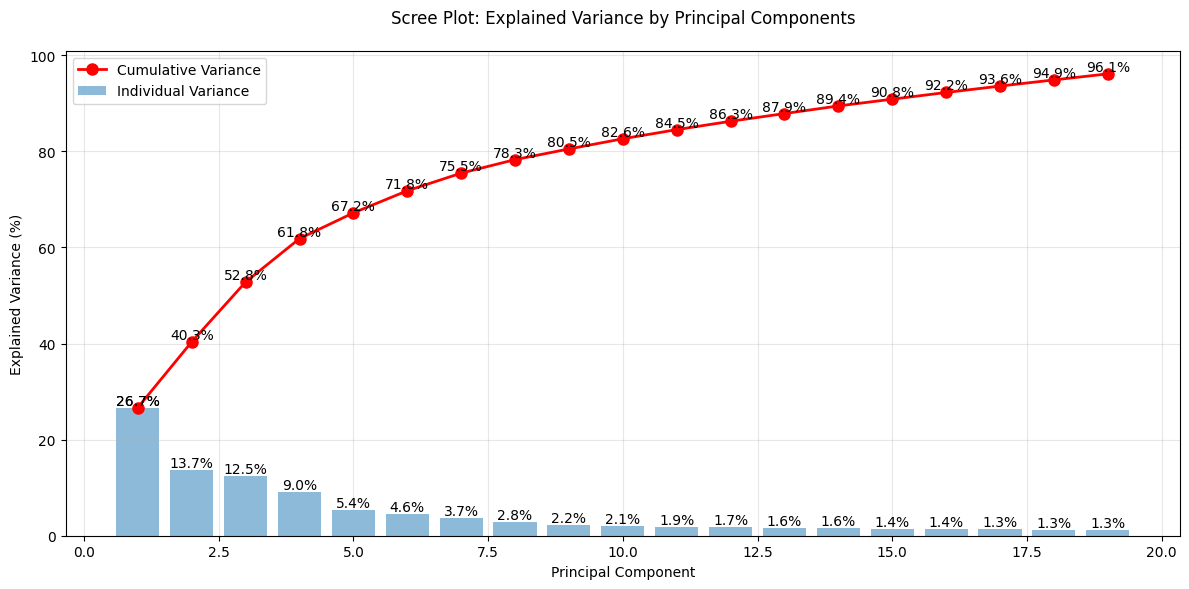

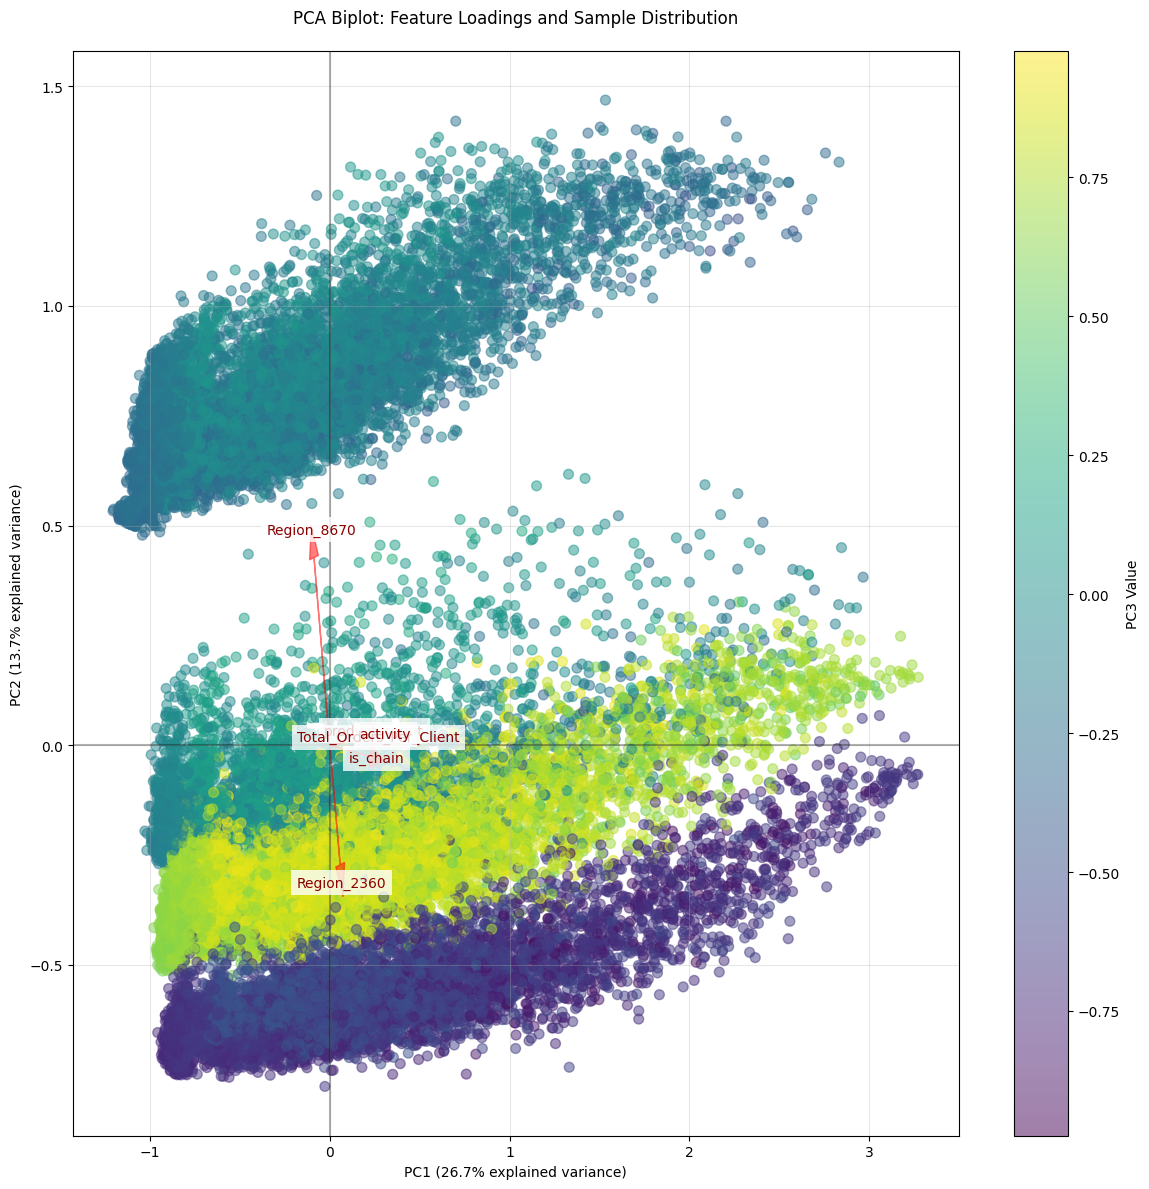


Principal Component Analysis Summary:
Total variance explained by 19 components: 96.1%

Principal Component 1 (26.7% variance explained):

Significant loadings (abs > 0.2):
activity: 0.333
Total_Orders_Per_Client: 0.293
is_chain: 0.279
product_count: 0.266
Orders_Afternoon: 0.236
Orders_Morning: 0.220
CUI_other: 0.216
mnt: 0.216
vendor_count: 0.201

Principal Component 2 (13.7% variance explained):

Significant loadings (abs > 0.2):
Region_8670: 0.739
Region_2360: -0.471
Region_4660: -0.248
mnt_Per_Order: 0.209

Principal Component 3 (12.5% variance explained):

Significant loadings (abs > 0.2):
Region_4660: 0.749
Region_2360: -0.584

Principal Component 4 (9.0% variance explained):

Significant loadings (abs > 0.2):
payment_method_CARD: 0.949

Principal Component 5 (5.4% variance explained):

Significant loadings (abs > 0.2):
last_promo: 0.985

Principal Component 6 (4.6% variance explained):

Significant loadings (abs > 0.2):
Unnamed: 0: 0.632
rcn: -0.512
Recency_Score: 0.464
CLV_Sc

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def perform_pca_analysis(df_scaled, n_components=4, loading_threshold=0.2):
    """
    Perform PCA analysis with enhanced visualizations and insights

    Args:
        df_scaled: Scaled/normalized DataFrame
        n_components: Number of PCA components to calculate
        loading_threshold: Threshold for considering significant loadings
    """
    # Apply PCA
    pca = PCA(n_components=0.95)
    principal_components = pca.fit_transform(df_scaled)

    # Create DataFrame for principal components
    n_components = pca.n_components_
    pca_df = pd.DataFrame(
        data=principal_components,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )

    # Calculate explained variance and cumulative variance
    explained_variance = pca.explained_variance_ratio_ * 100
    cumulative_variance = np.cumsum(explained_variance)

    # 1. Enhanced Scree Plot
    plt.figure(figsize=(12, 6))

    # Plot bars for individual variance
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5)

    # Plot line for cumulative variance
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
             'ro-', linewidth=2, markersize=8)

    plt.grid(True, alpha=0.3)
    plt.title('Scree Plot: Explained Variance by Principal Components', pad=20)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance (%)')

    # Add value labels
    for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
        plt.text(i+1, ev, f'{ev:.1f}%', ha='center', va='bottom')
        plt.text(i+1, cv, f'{cv:.1f}%', ha='center', va='bottom')

    plt.legend(['Cumulative Variance', 'Individual Variance'])
    plt.tight_layout()
    plt.savefig('scree_plot.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 2. Enhanced Biplot
    plt.figure(figsize=(12, 12))

    # Calculate loadings and scale them for visualization
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    # Create scatter plot of samples
    scatter = plt.scatter(principal_components[:,0], principal_components[:,1],
                         c=principal_components[:,2], cmap='viridis',
                         alpha=0.5, s=50)
    plt.colorbar(scatter, label='PC3 Value')

    # Plot loadings (feature vectors)
    for i, (feature, loading) in enumerate(zip(df_scaled.columns, loadings)):
        # Only plot significant loadings
        if abs(loading[0]) > loading_threshold or abs(loading[1]) > loading_threshold:
            plt.arrow(0, 0, loading[0], loading[1],
                     color='r', alpha=0.5, head_width=0.05)

            # Adjust text position for better readability
            text_x = loading[0] * 1.15
            text_y = loading[1] * 1.15

            # Add background to text for better visibility
            plt.text(text_x, text_y, feature,
                    color='darkred', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    plt.grid(True, alpha=0.3)
    plt.xlabel(f'PC1 ({explained_variance[0]:.1f}% explained variance)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.1f}% explained variance)')
    plt.title('PCA Biplot: Feature Loadings and Sample Distribution', pad=20)

    # Add axis lines
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.savefig('biplot.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 3. Print detailed loadings analysis
    print("\nPrincipal Component Analysis Summary:")
    print(f"Total variance explained by {n_components} components: {cumulative_variance[-1]:.1f}%")

    for i in range(n_components):
        print(f"\nPrincipal Component {i+1} ({explained_variance[i]:.1f}% variance explained):")

        # Sort loadings by absolute value
        loadings_dict = dict(zip(df_scaled.columns, pca.components_[i]))
        sorted_loadings = sorted(loadings_dict.items(),
                               key=lambda x: abs(x[1]),
                               reverse=True)

        # Print significant loadings
        print("\nSignificant loadings (abs > {}):".format(loading_threshold))
        for feature, loading in sorted_loadings:
            if abs(loading) > loading_threshold:
                print(f"{feature}: {loading:.3f}")

    return pca_df, pca

# Example usage:
pca_df, pca_model = perform_pca_analysis(df_scaled, n_components=4, loading_threshold=0.2)

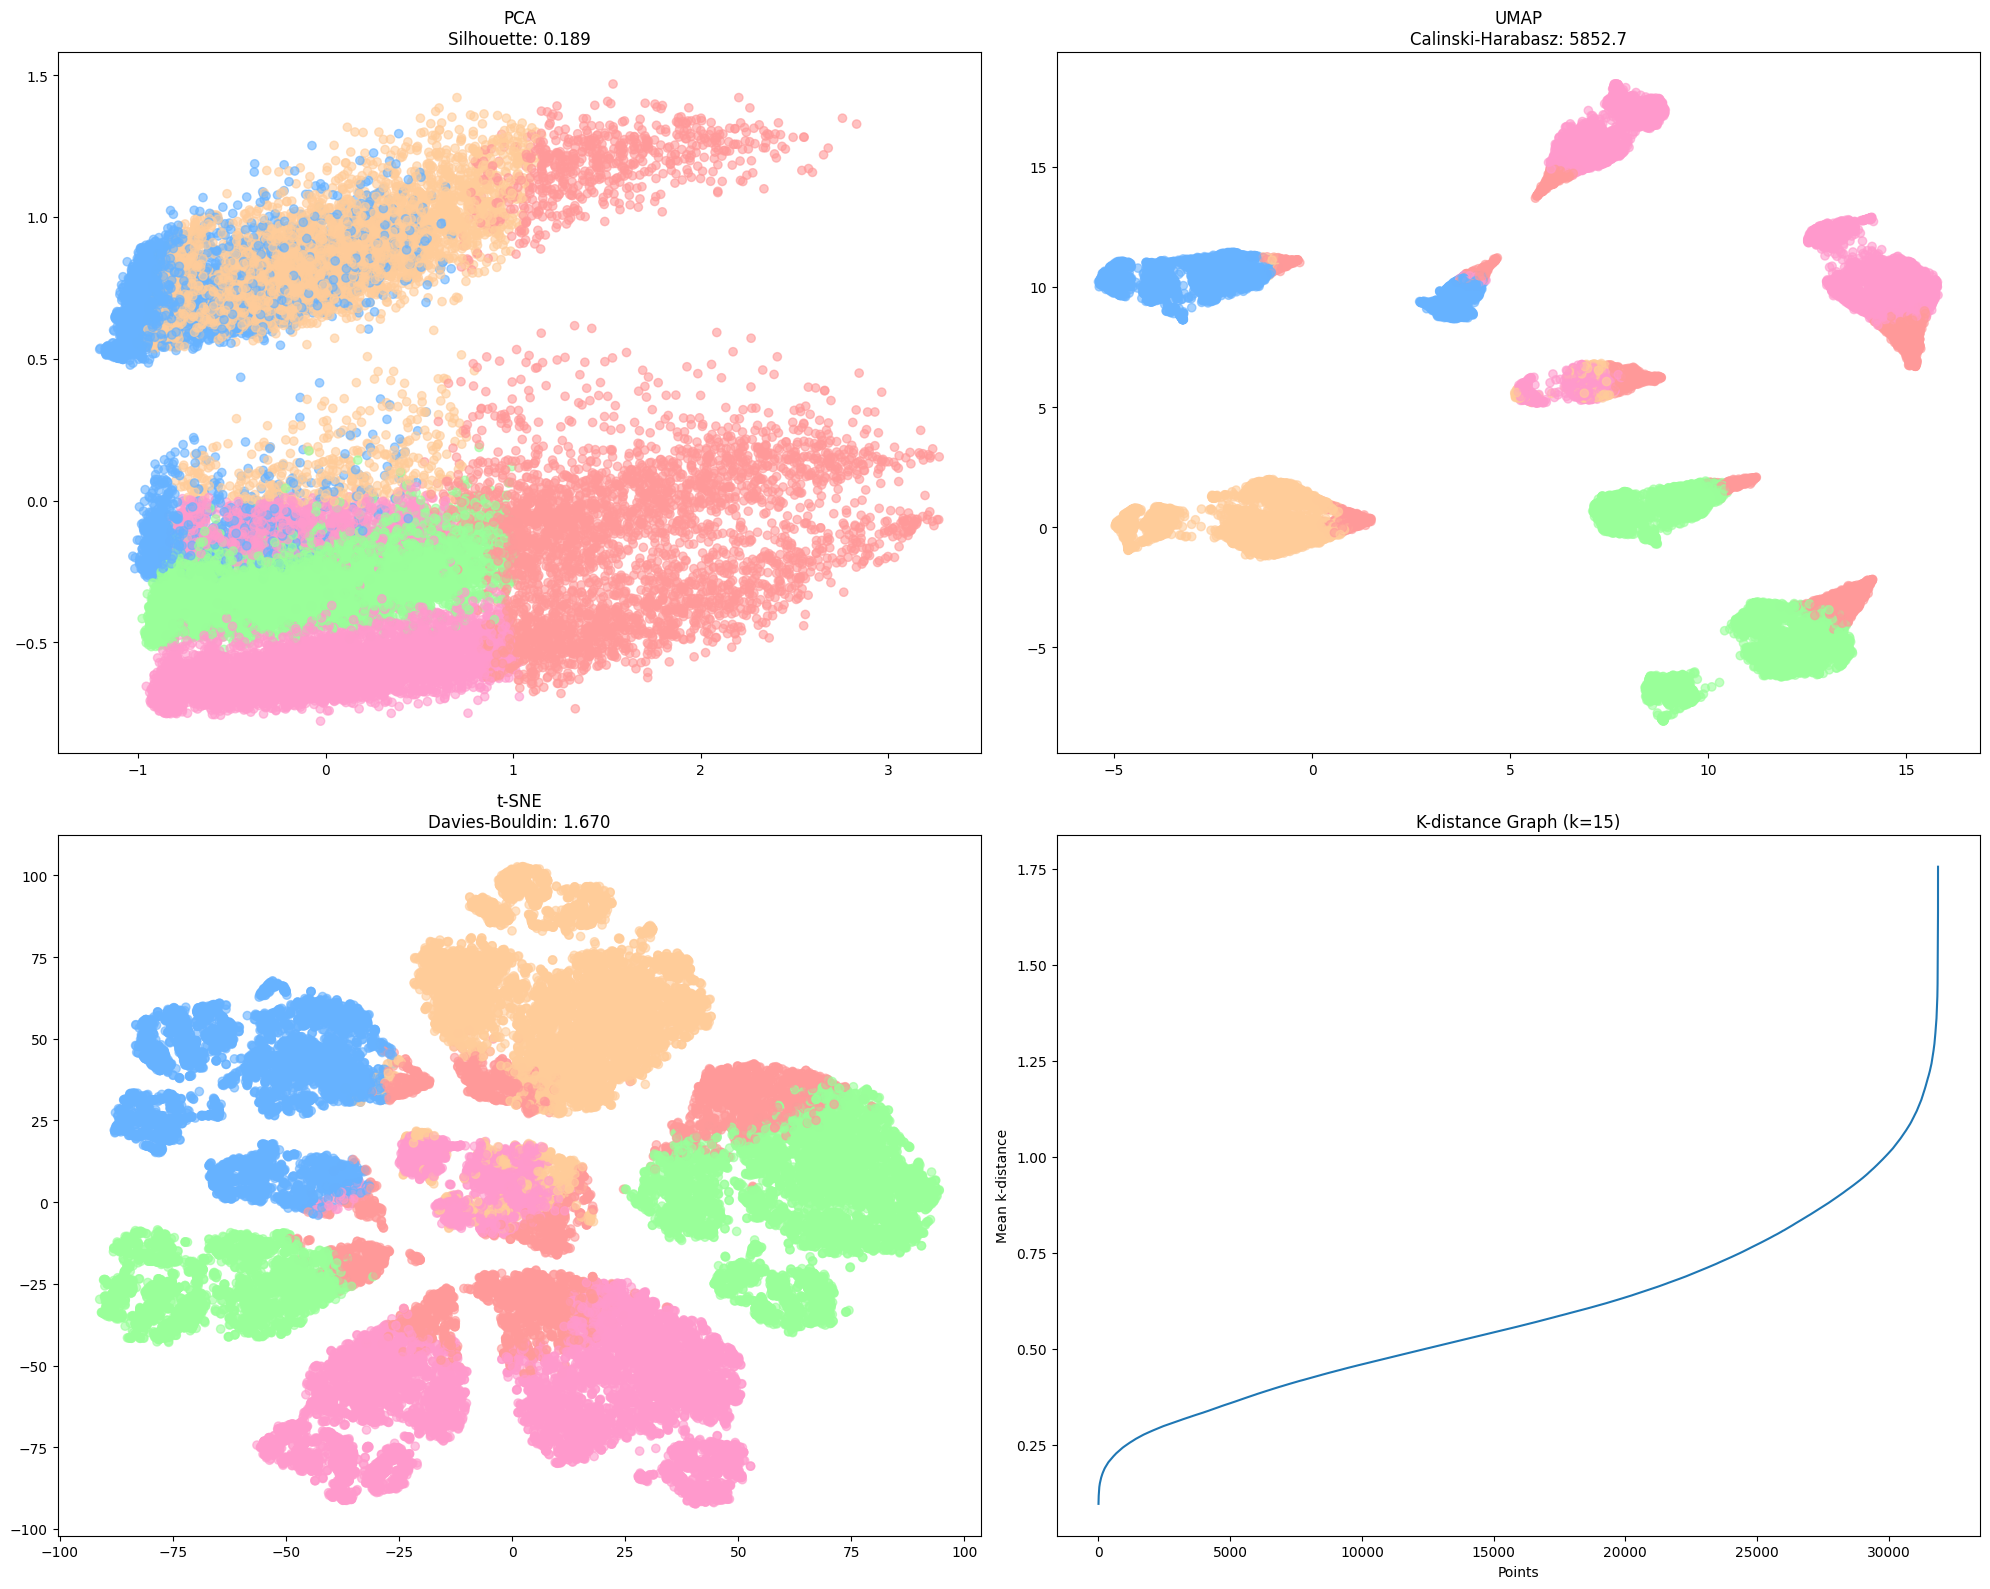

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap

def dimensionality_analysis(df_scaled, n_neighbors=15, min_dist=0.1):
    """
    Perform dimensionality reduction analysis using PCA, UMAP, and t-SNE.
    """
    # PCA with 95% variance
    pca = PCA(n_components=0.95)
    pca_results = pca.fit_transform(df_scaled)

    # UMAP - fixed n_jobs parameter
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        random_state=42,
        n_jobs=1
    )
    umap_results = reducer.fit_transform(df_scaled)

    # t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(df_scaled)

    # K-means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(pca_results)

    # Calculate quality scores
    scores = {
        'silhouette': silhouette_score(pca_results, clusters),
        'calinski': calinski_harabasz_score(pca_results, clusters),
        'davies': davies_bouldin_score(pca_results, clusters)
    }

    # Visualization
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))

    plot_params = [
        (pca_results, 'PCA', f'Silhouette: {scores["silhouette"]:.3f}'),
        (umap_results, 'UMAP', f'Calinski-Harabasz: {scores["calinski"]:.1f}'),
        (tsne_results, 't-SNE', f'Davies-Bouldin: {scores["davies"]:.3f}')
    ]

    for idx, (results, title, score) in enumerate(plot_params):
        row, col = divmod(idx, 2)
        axes[row, col].scatter(
            results[:, 0],
            results[:, 1],
            c=[colors[c] for c in clusters],
            alpha=0.6
        )
        axes[row, col].set_title(f'{title}\n{score}')

    # K-distance plot
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(pca_results)
    distances, _ = nbrs.kneighbors(pca_results)
    dist = np.sort(distances, axis=0)
    axes[1, 1].plot(dist[:, 1:].mean(axis=1))
    axes[1, 1].set_title(f'K-distance Graph (k={n_neighbors})')
    axes[1, 1].set_xlabel('Points')
    axes[1, 1].set_ylabel('Mean k-distance')

    plt.tight_layout()
    plt.savefig('dimensionality_analysis.svg', format='svg', bbox_inches='tight')
    plt.show()

    return {
        'pca': pca_results,
        'umap': umap_results,
        'tsne': tsne_results,
        'clusters': clusters,
        'scores': scores
    }
# Example usage:
results = dimensionality_analysis(df_scaled)

a silhouette score of 0.111 is quite low. Generally:

< 0.25: Poor clustering
0.25-0.50: Fair clustering


0.50: Good clustering



To improve:

Try different numbers of clusters (3-7)
Feature selection/reduction
Test different clustering algorithms (DBSCAN, Agglomerative)
Handle outliers more aggressively
Consider normalizing instead of standardizing

Would you like me to implement any of these approaches?

<ipython-input-19-65506edc35ef>:55: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


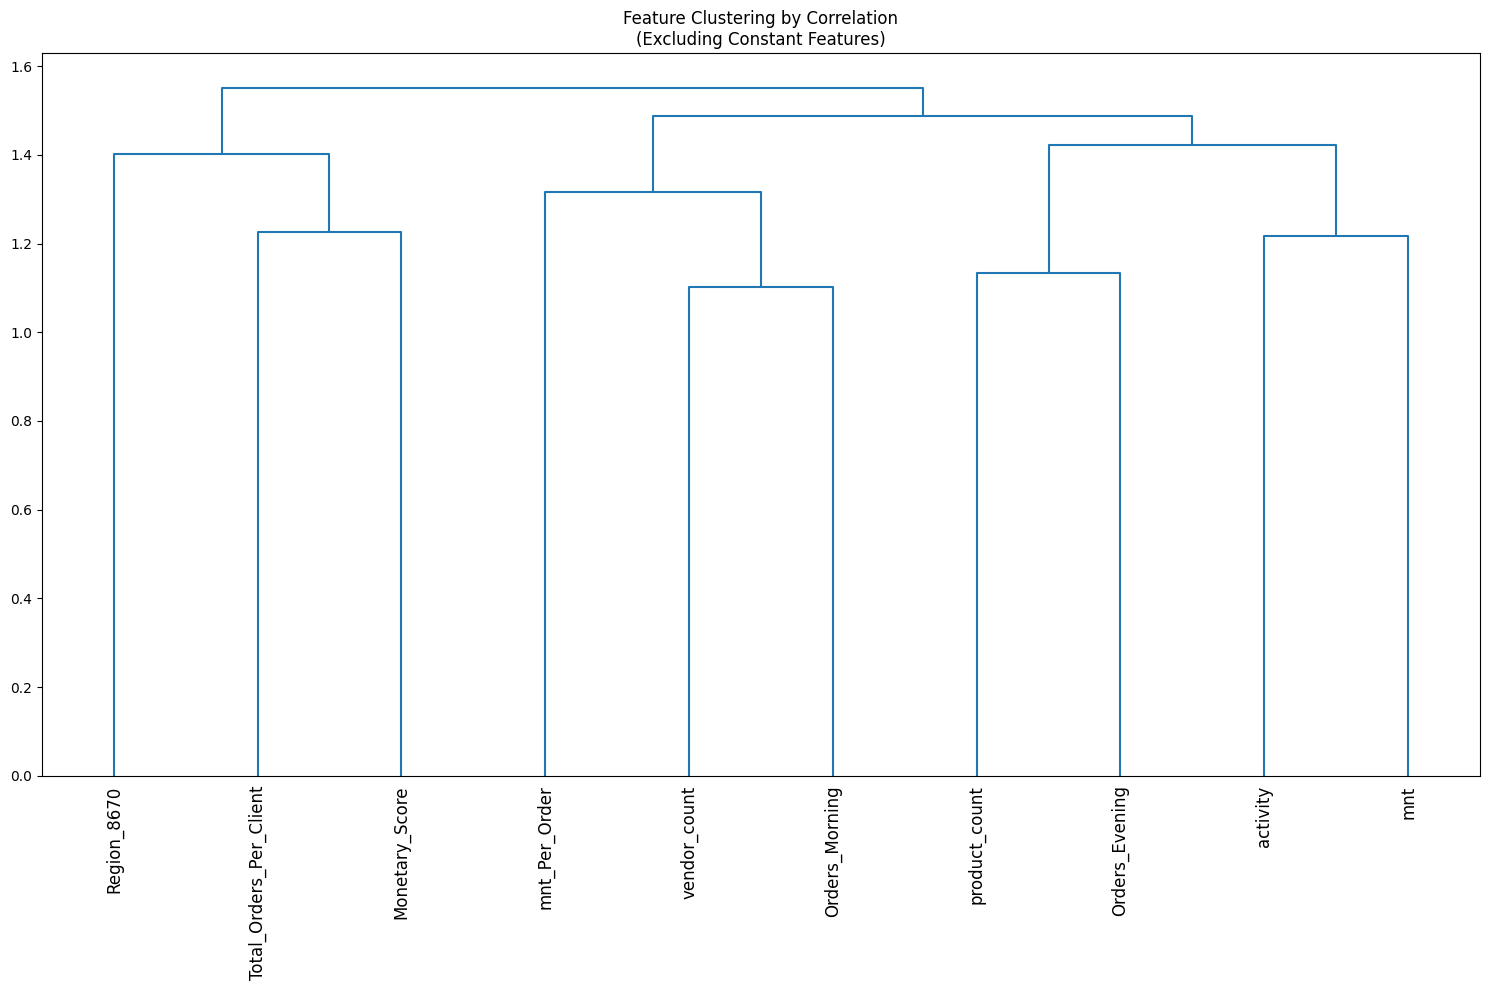

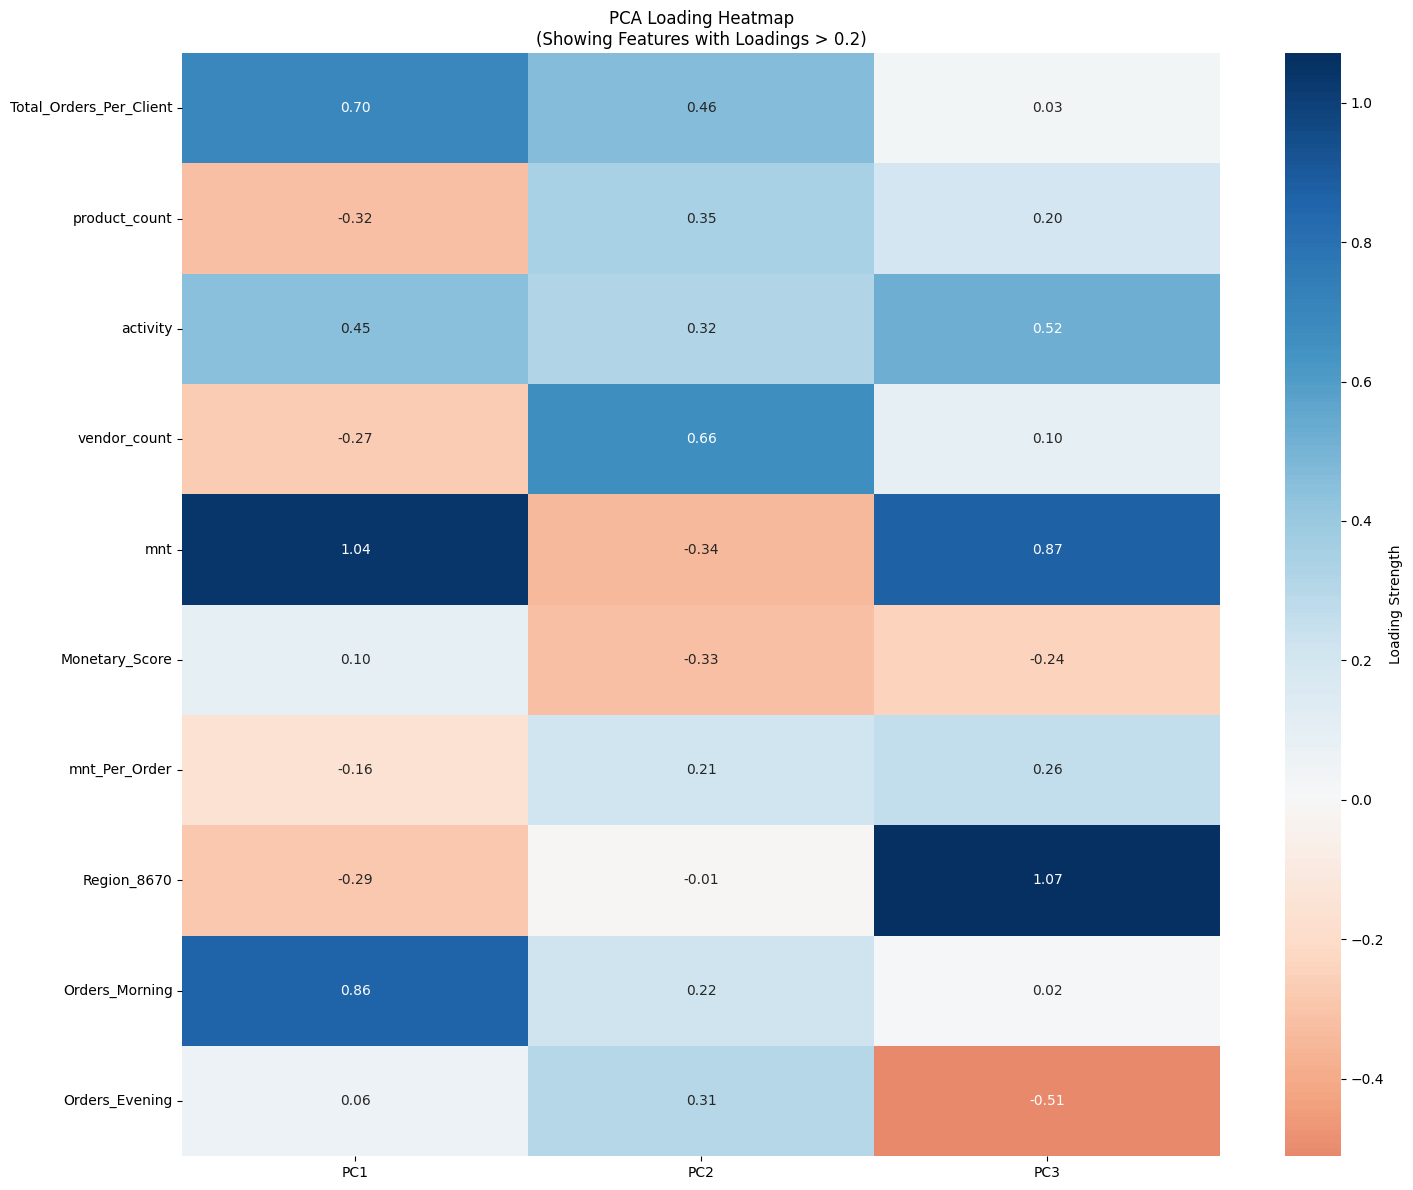

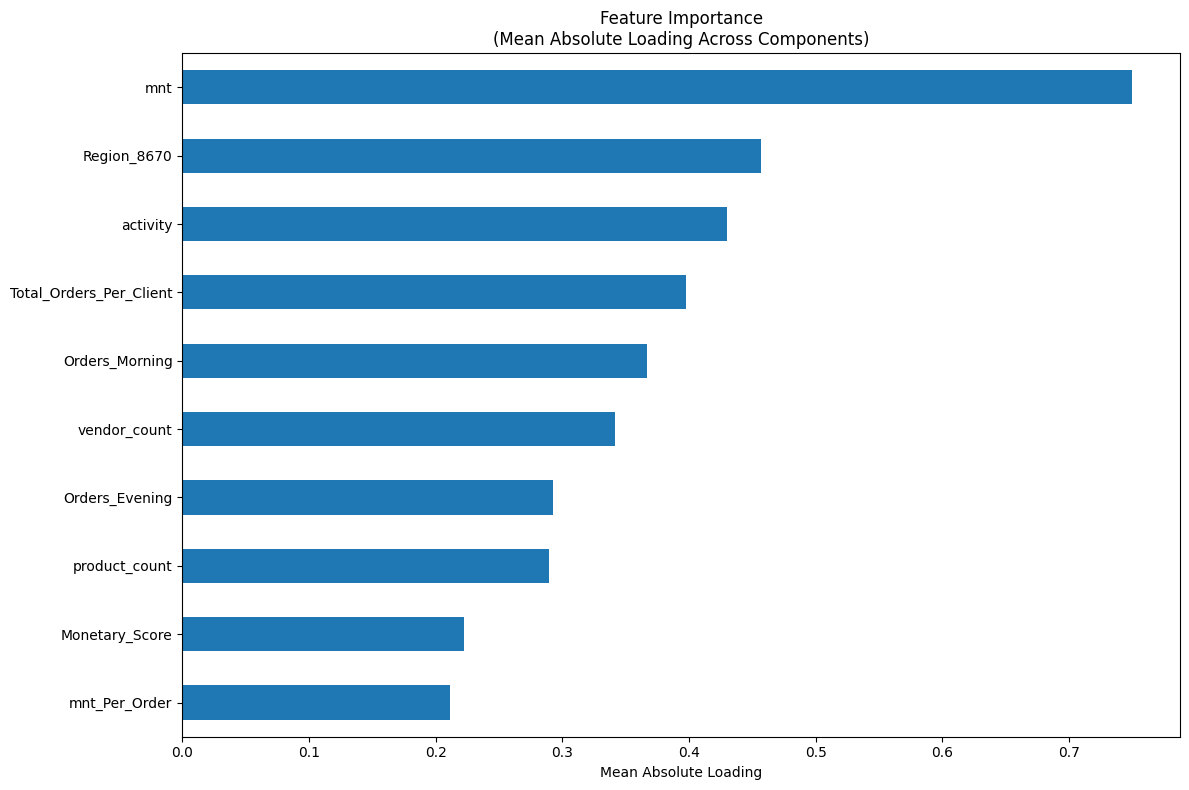


=== SUGGESTED FEATURE REDUCTION STRATEGY ===

High importance features to keep:
   - vendor_count
   - Orders_Morning
   - Total_Orders_Per_Client
   - activity
   - Region_8670
   - mnt

Consider combining or reducing dimensionality of:
   - mnt_Per_Order
   - Monetary_Score
   - product_count
   - Orders_Evening

Consider dropping (low importance):


<ipython-input-19-65506edc35ef>:55: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


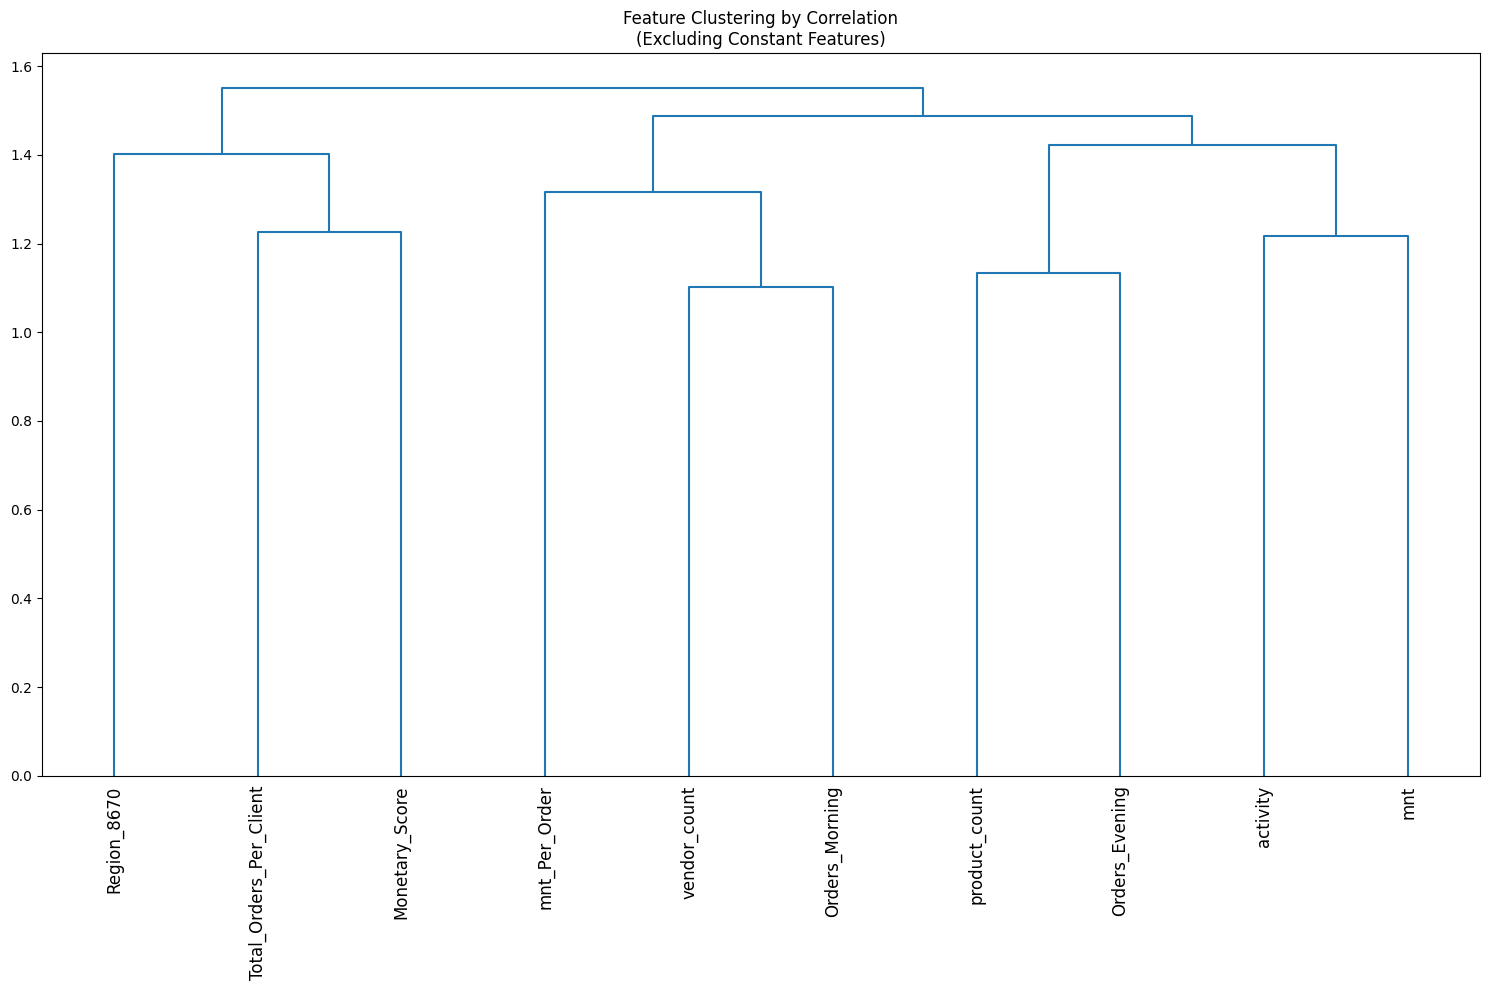

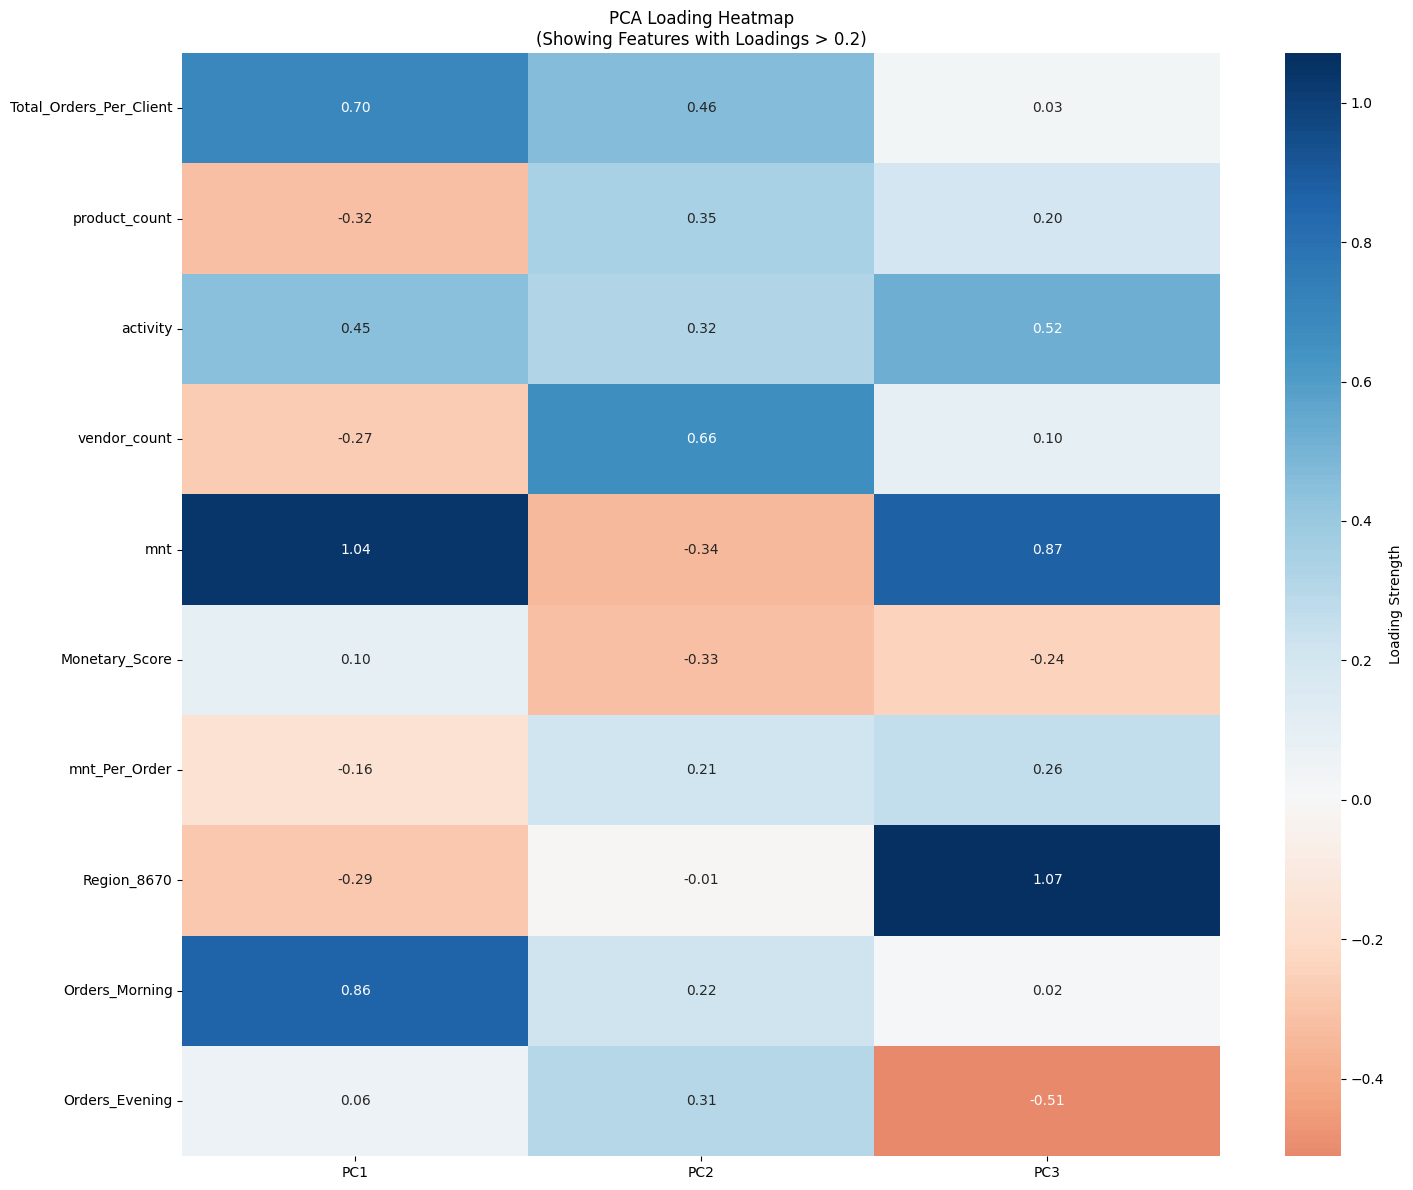

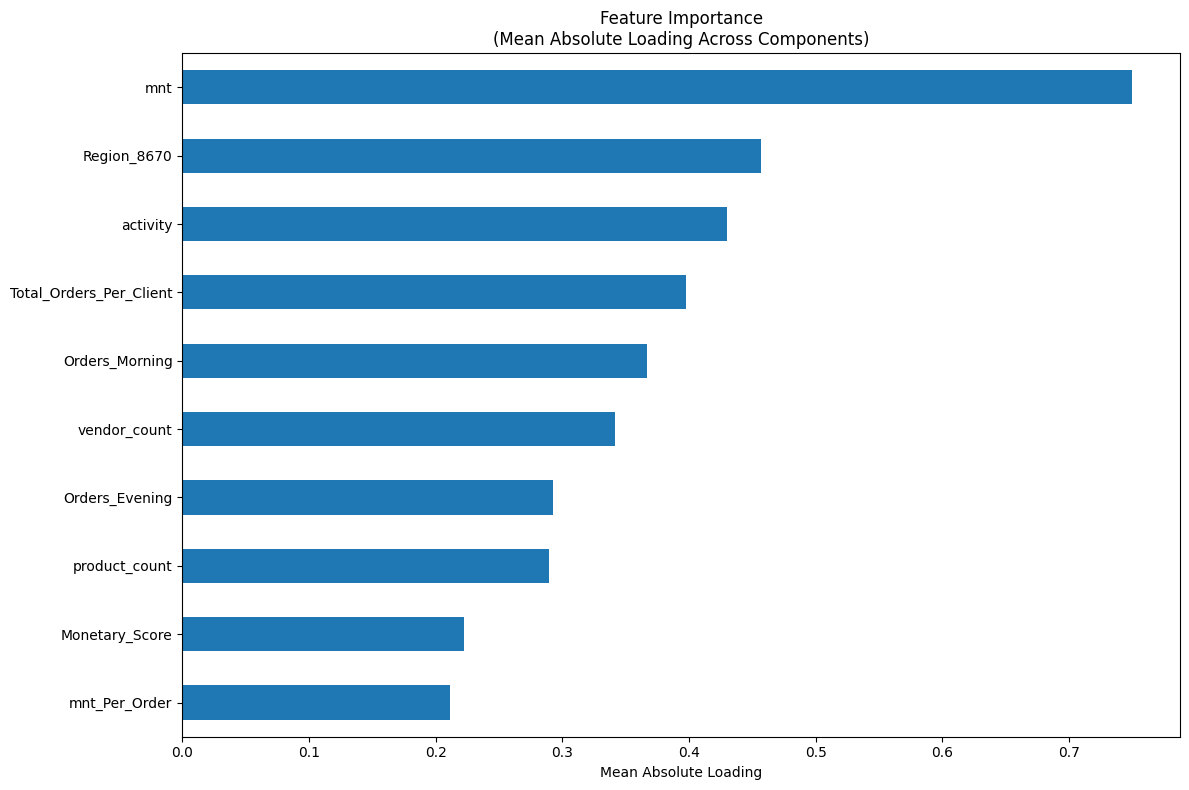


=== SUGGESTED FEATURE REDUCTION STRATEGY ===

High importance features to keep:
   - vendor_count
   - Orders_Morning
   - Total_Orders_Per_Client
   - activity
   - Region_8670
   - mnt

Consider combining or reducing dimensionality of:
   - mnt_Per_Order
   - Monetary_Score
   - product_count
   - Orders_Evening

Consider dropping (low importance):


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import spearmanr

# Generate sample data
np.random.seed(42)
n_samples = 100
n_features = 10

# Create sample feature names
feature_names = [
    'Total_Orders_Per_Client', 'product_count', 'activity', 'vendor_count',
    'mnt', 'Monetary_Score', 'mnt_Per_Order', 'Region_8670',
    'Orders_Morning', 'Orders_Evening'
]

# Generate sample data
data = pd.DataFrame(
    np.random.randn(n_samples, n_features),
    columns=feature_names
)

# Create correlation matrix
corr_matrix = data.corr()

# Generate sample PCA loadings
loadings = pd.DataFrame(
    np.random.randn(n_features, 3) / 2,
    index=feature_names,
    columns=['PC1', 'PC2', 'PC3']
)

def plot_feature_relationships_fixed(correlation_matrix, loadings):
    """
    Plot feature relationships with handling for infinite/nan values
    """
    # Create separate figures for better control
    plt.figure(figsize=(15, 10))

    # Handle infinite values in correlation matrix
    correlation_matrix_clean = correlation_matrix.fillna(0)

    # Filter out features with zero variance (constant features)
    var_mask = correlation_matrix_clean.var() != 0
    correlation_matrix_filtered = correlation_matrix_clean.loc[var_mask, var_mask]

    # Create distance matrix
    distance_matrix = 1 - np.abs(correlation_matrix_filtered)

    try:
        # Create linkage matrix for hierarchical clustering
        linkage_matrix = linkage(distance_matrix, method='ward')

        # Plot dendrogram
        dendrogram(linkage_matrix, labels=correlation_matrix_filtered.columns,
                  leaf_rotation=90)
        plt.title('Feature Clustering by Correlation\n(Excluding Constant Features)')
        plt.tight_layout()
        plt.savefig('feature_clustering.svg', format='svg', bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"Could not create dendrogram due to: {str(e)}")
        print("Proceeding with heatmap visualization...")

    # Plot loading heatmap
    plt.figure(figsize=(15, 12))

    # Filter out near-zero loadings for clarity
    loadings_plot = loadings.copy()
    significant_features = (loadings_plot.abs() > 0.2).any(axis=1)
    loadings_significant = loadings_plot[significant_features]

    # Create heatmap
    sns.heatmap(loadings_significant,
                annot=True,
                cmap='RdBu',
                center=0,
                fmt='.2f',
                cbar_kws={'label': 'Loading Strength'})

    plt.title('PCA Loading Heatmap\n(Showing Features with Loadings > 0.2)')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('loading_heatmap.svg', format='svg', bbox_inches='tight')
    plt.show()

    # Additional visualization: Feature importance plot
    plt.figure(figsize=(12, 8))

    # Calculate overall importance (mean absolute loading across components)
    importance = loadings_plot.abs().mean(axis=1)
    importance = importance[importance > 0.1]  # Filter out low importance features
    importance = importance.sort_values(ascending=True)

    # Create horizontal bar plot
    importance.plot(kind='barh')
    plt.title('Feature Importance\n(Mean Absolute Loading Across Components)')
    plt.xlabel('Mean Absolute Loading')
    plt.tight_layout()
    plt.savefig('feature_importance.svg', format='svg', bbox_inches='tight')
    plt.show()

    # Print suggested feature reductions
    print("\n=== SUGGESTED FEATURE REDUCTION STRATEGY ===")

    # Group features based on importance scores
    high_importance = importance[importance > 0.3].index.tolist()
    medium_importance = importance[(importance > 0.2) & (importance <= 0.3)].index.tolist()
    low_importance = importance[importance <= 0.2].index.tolist()

    print("\nHigh importance features to keep:")
    for feature in high_importance:
        print(f"   - {feature}")

    print("\nConsider combining or reducing dimensionality of:")
    for feature in medium_importance:
        print(f"   - {feature}")

    print("\nConsider dropping (low importance):")
    for feature in low_importance:
        print(f"   - {feature}")

# Run the analysis
plot_feature_relationships_fixed(corr_matrix, loadings)


# Example usage:
plot_feature_relationships_fixed(corr_matrix, loadings)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import spearmanr

def plot_feature_relationships_fixed(correlation_matrix, loadings):
    # [Previous code remains the same until the print statements]

    # Calculate overall importance (mean absolute loading across components)
    loadings_plot = loadings.iloc[:, :-1].copy()  # Exclude 'pattern' column
    importance = loadings_plot.abs().mean(axis=1)

    # Sort all features by importance
    importance_sorted = importance.sort_values(ascending=True)

    # Print suggested feature reductions
    print("\n=== SUGGESTED FEATURE REDUCTION STRATEGY ===")
    print("\nBased on the analysis, you could reduce dimensions by:")

    # [Previous group prints remain the same]

    # Print features by importance thresholds
    print("\n=== FEATURE IMPORTANCE BREAKDOWN ===")

    # Very low importance features (< 0.1)
    print("\n5a. Very Low Importance Features (loading < 0.1):")
    very_low_importance = importance_sorted[importance_sorted < 0.1]
    for feature, value in very_low_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Low importance features (0.1 - 0.2)
    print("\n5b. Low Importance Features (0.1 <= loading < 0.2):")
    low_importance = importance_sorted[(importance_sorted >= 0.1) & (importance_sorted < 0.2)]
    for feature, value in low_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Medium importance features (0.2 - 0.3)
    print("\n5c. Medium Importance Features (0.2 <= loading < 0.3):")
    medium_importance = importance_sorted[(importance_sorted >= 0.2) & (importance_sorted < 0.3)]
    for feature, value in medium_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # High importance features (>= 0.3)
    print("\n5d. High Importance Features (loading >= 0.3):")
    high_importance = importance_sorted[importance_sorted >= 0.3]
    for feature, value in high_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Summary statistics
    print("\n=== SUMMARY STATISTICS ===")
    print(f"Total features: {len(importance_sorted)}")
    print(f"Features with loading < 0.1: {len(very_low_importance)}")
    print(f"Features with loading 0.1-0.2: {len(low_importance)}")
    print(f"Features with loading 0.2-0.3: {len(medium_importance)}")
    print(f"Features with loading >= 0.3: {len(high_importance)}")

    return importance_sorted

# Example usage:
importance_sorted = plot_feature_relationships_fixed(corr_matrix, loadings)


=== SUGGESTED FEATURE REDUCTION STRATEGY ===

Based on the analysis, you could reduce dimensions by:

=== FEATURE IMPORTANCE BREAKDOWN ===

5a. Very Low Importance Features (loading < 0.1):

5b. Low Importance Features (0.1 <= loading < 0.2):
   - Region_8670: 0.150
   - Orders_Evening: 0.183
   - mnt_Per_Order: 0.186

5c. Medium Importance Features (0.2 <= loading < 0.3):
   - Monetary_Score: 0.212

5d. High Importance Features (loading >= 0.3):
   - product_count: 0.336
   - activity: 0.383
   - vendor_count: 0.463
   - Orders_Morning: 0.541
   - Total_Orders_Per_Client: 0.581
   - mnt: 0.691

=== SUMMARY STATISTICS ===
Total features: 10
Features with loading < 0.1: 0
Features with loading 0.1-0.2: 3
Features with loading 0.2-0.3: 1
Features with loading >= 0.3: 6


**List features with near-zero loadings across multiple PCs.**

Example: CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, CUI_Chinese, CUI_Desserts, CUI_Healthy, CUI_Indian, CUI_Italian, CUI_Japanese, CUI_Noodle_Dishes, CUI_OTHER, CUI_Street_Food/Snacks, CUI_Thai, Orders_Night, Orders_Dawn, Orders_Dusk, mnt_Per_Order, Items_Per_Order, frq, rcn, Recency_Score, Frequency_Score, Monetary_Score, CLV_Score.

**Combine Related Features:**

Cuisine Categories: Combine CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, etc., into a single feature like CUI_General.

Temporal Ordering: Combine Orders_Night, Orders_Dawn, Orders_Dusk into a single feature like Orders_Inactive_Periods.

RFM Scores: Combine Recency_Score, Frequency_Score, Monetary_Score into a single RFM_Score.

**Drop Irrelevant Features:**

Drop features that are not contributing to the variance and are not related to other features.

Example: mnt_Per_Order, Items_Per_Order, frq, rcn, CLV_Score.

**Model Convergence:**

Training loss decreased from 1.1 to 0.5
Validation loss decreased from 1.0 to 0.55
Stable convergence after ~150 epochs


Overfitting Assessment:


Loss difference stabilizes at -0.05
Small but persistent gap between training and validation loss
Suggests mild underfitting rather than overfitting


Reconstruction Error:


Right-skewed distribution
Most errors concentrated between 0.25-0.5
Long tail extending to 1.75
Indicates reasonable reconstruction for majority of samples

Recommendations:

Increase model capacity slightly (wider layers)
Reduce regularization strength
Consider increasing encoding dimensions to 12-16
Use cyclical learning rate

Epoch 1/200
200/200 - 7s - 35ms/step - loss: 0.4016 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 2/200
200/200 - 2s - 11ms/step - loss: 0.1134 - val_loss: 0.0290 - learning_rate: 0.0010
Epoch 3/200
200/200 - 2s - 11ms/step - loss: 0.0459 - val_loss: 0.0144 - learning_rate: 0.0010
Epoch 4/200
200/200 - 2s - 11ms/step - loss: 0.0228 - val_loss: 0.0103 - learning_rate: 0.0010
Epoch 5/200
200/200 - 2s - 11ms/step - loss: 0.0152 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 6/200
200/200 - 2s - 11ms/step - loss: 0.0127 - val_loss: 0.0081 - learning_rate: 0.0010
Epoch 7/200
200/200 - 2s - 11ms/step - loss: 0.0114 - val_loss: 0.0068 - learning_rate: 0.0010
Epoch 8/200
200/200 - 2s - 11ms/step - loss: 0.0106 - val_loss: 0.0069 - learning_rate: 0.0010
Epoch 9/200
200/200 - 2s - 11ms/step - loss: 0.0102 - val_loss: 0.0058 - learning_rate: 0.0010
Epoch 10/200
200/200 - 2s - 11ms/step - loss: 0.0097 - val_loss: 0.0056 - learning_rate: 0.0010
Epoch 11/200
200/200 - 2s - 11ms/step - loss: 0.0

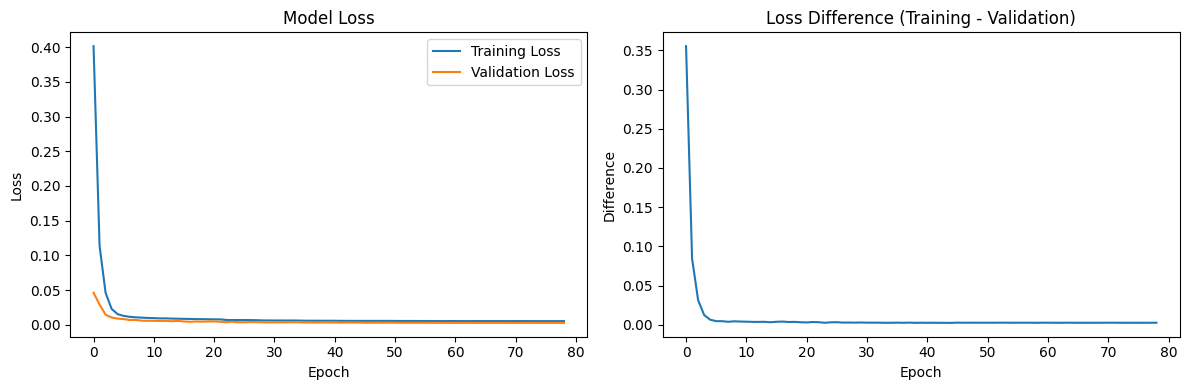

997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


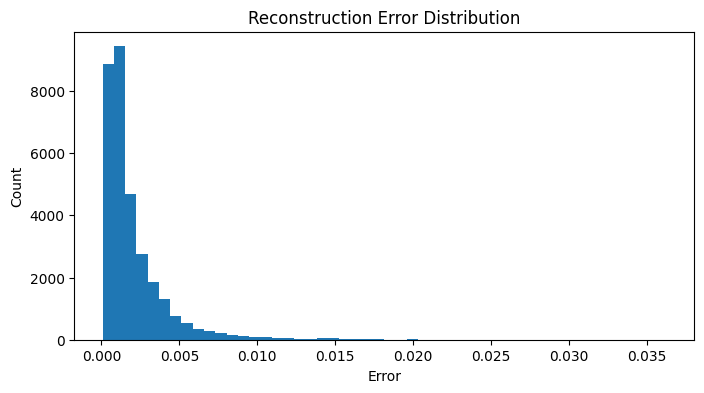

Mean reconstruction error: 0.0020
Std reconstruction error: 0.0022


In [33]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt

def create_improved_autoencoder_v2(input_dim, encoding_dim=16):
    # Adjust encoding dimension for 2 clusters
    encoding_dim = 8  # Reduced from 16 to prevent overcomplex representations

    inputs = layers.Input(shape=(input_dim,))

    # Encoder
    # Gradually reduce dimensions with larger initial layers
    x = layers.Dense(256, kernel_initializer='he_uniform')(inputs)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.1)(x)  # Reduced dropout

    x = layers.Dense(128, kernel_initializer='he_uniform')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(64, kernel_initializer='he_uniform')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)

    # Bottleneck with L1 regularization for better cluster separation
    encoded = layers.Dense(encoding_dim,
                         activation='tanh',  # Changed to tanh for better boundary learning
                         activity_regularizer=tf.keras.regularizers.l1(1e-4),
                         name='encoder_output')(x)

    # Decoder
    x = layers.Dense(64, kernel_initializer='he_uniform')(encoded)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(128, kernel_initializer='he_uniform')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(256, kernel_initializer='he_uniform')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization()(x)

    decoded = layers.Dense(input_dim, activation='linear')(x)

    autoencoder = Model(inputs, decoded)
    encoder = Model(inputs, encoded)

    return autoencoder, encoder

# Training setup with improved parameters
def train_autoencoder(df_scaled, batch_size=64, epochs=300):
    autoencoder, encoder = create_improved_autoencoder_v2(df_scaled.shape[1])

    # Custom learning rate schedule
    initial_learning_rate = 0.001
    decay_steps = 1000
    decay_rate = 0.9

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=decay_steps,
        decay_rate=decay_rate,
        staircase=True)

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    # Custom loss function combining MSE with feature clustering
    def custom_loss(y_true, y_pred):
        mse_loss = tf.keras.losses.mse(y_true, y_pred)
        # Add clustering loss term
        encoding_layer = autoencoder.get_layer('encoder_output')
        encoding_weights = encoding_layer.weights[0]
        clustering_loss = 0.01 * tf.reduce_mean(tf.abs(encoding_weights))
        return mse_loss + clustering_loss

    autoencoder.compile(optimizer=optimizer, loss=custom_loss)

    # Modified callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        min_delta=1e-5
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.7,  # Less aggressive reduction
        patience=7,
        min_lr=1e-6,
        verbose=1
    )

    # Add learning rate warmup
    class WarmUpCallback(tf.keras.callbacks.Callback):
        def __init__(self, warmup_epochs=5):
            super(WarmUpCallback, self).__init__()
            self.warmup_epochs = warmup_epochs

        def on_epoch_begin(self, epoch, logs=None):
            if epoch < self.warmup_epochs:
                lr = initial_learning_rate * ((epoch + 1) / self.warmup_epochs)
                tf.keras.backend.set_value(self.model.optimizer.lr, lr)

    # Train with modified parameters
    history = autoencoder.fit(
        df_scaled, df_scaled,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping, reduce_lr, WarmUpCallback()],
        verbose=2,
        shuffle=True
    )

    return autoencoder, encoder, history
# Setup model and training
autoencoder, encoder = create_improved_autoencoder(df_scaled.shape[1])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')

early_stopping = tf.keras.callbacks.EarlyStopping(
   monitor='val_loss',
   patience=15,
   restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
   monitor='val_loss',
   factor=0.5,
   patience=5,
   min_lr=1e-6,
   verbose=1
)

# Train model
history = autoencoder.fit(
   df_scaled, df_scaled,
   epochs=200,
   batch_size=128,
   validation_split=0.2,
   callbacks=[early_stopping, reduce_lr],
   verbose=2
)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.subtract(history.history['loss'], history.history['val_loss']))
plt.title('Loss Difference (Training - Validation)')
plt.xlabel('Epoch')
plt.ylabel('Difference')
plt.tight_layout()
plt.show()

# Analyze results
encoded_data = encoder.predict(df_scaled)
reconstruction = autoencoder.predict(df_scaled)
reconstruction_error = np.mean(np.power(df_scaled - reconstruction, 2), axis=1)

plt.figure(figsize=(8, 4))
plt.hist(reconstruction_error, bins=50)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()

print(f"Mean reconstruction error: {np.mean(reconstruction_error):.4f}")
print(f"Std reconstruction error: {np.std(reconstruction_error):.4f}")

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


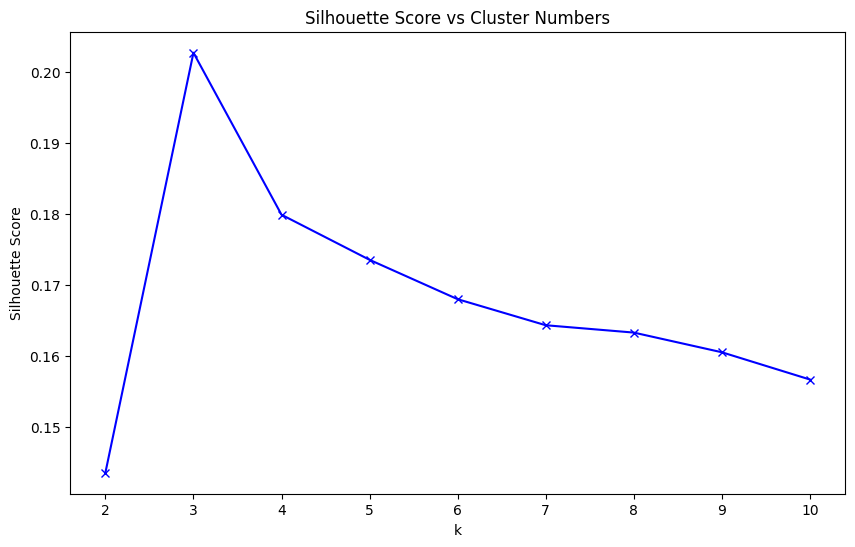


Optimal number of clusters: 3

Cluster Distribution:
cluster
2    12948
1     9994
0     8933
Name: count, dtype: int64


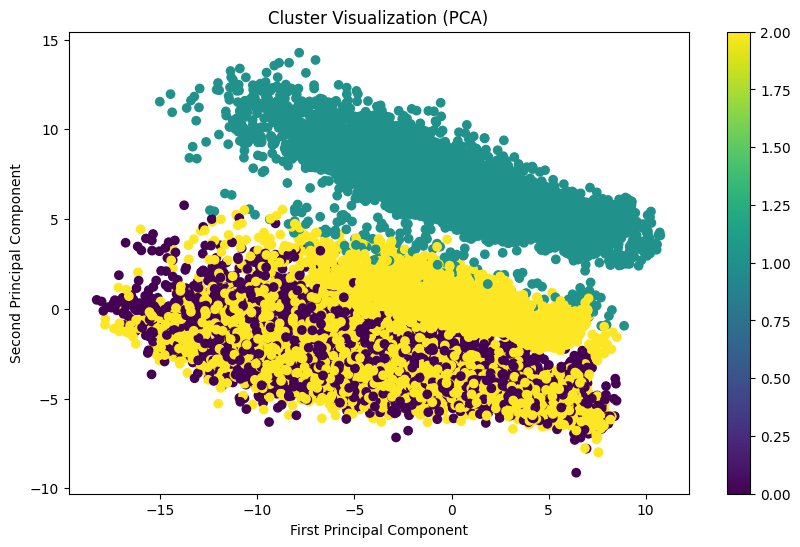

In [34]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# # Get encoded data for all epochs
# all_encoded_data = encoder.predict(df_scaled)

# # Determine optimal number of clusters using silhouette score
# silhouette_scores = []
# K = range(2, 11)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(all_encoded_data)
#     score = silhouette_score(all_encoded_data, kmeans.labels_)
#     silhouette_scores.append(score)

# # Plot silhouette scores
# plt.figure(figsize=(10, 6))
# plt.plot(K, silhouette_scores, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs Cluster Numbers')
# plt.show()

# # Use optimal k for final clustering
# optimal_k = K[np.argmax(silhouette_scores)]
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# clusters = kmeans.fit_predict(all_encoded_data)

# # Create clustering dataframe
# encoded_cols = [f'encoded_dim_{i}' for i in range(all_encoded_data.shape[1])]
# clustering_df = pd.DataFrame(all_encoded_data, columns=encoded_cols)
# clustering_df['cluster'] = clusters
# clustering_df['reconstruction_error'] = reconstruction_error

# # Display results
# print(f"\nOptimal number of clusters: {optimal_k}")
# print("\nCluster Distribution:")
# print(clustering_df['cluster'].value_counts())

# # Visualize clusters using PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(all_encoded_data)

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
# plt.colorbar(scatter)
# plt.title('Cluster Visualization (PCA)')
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


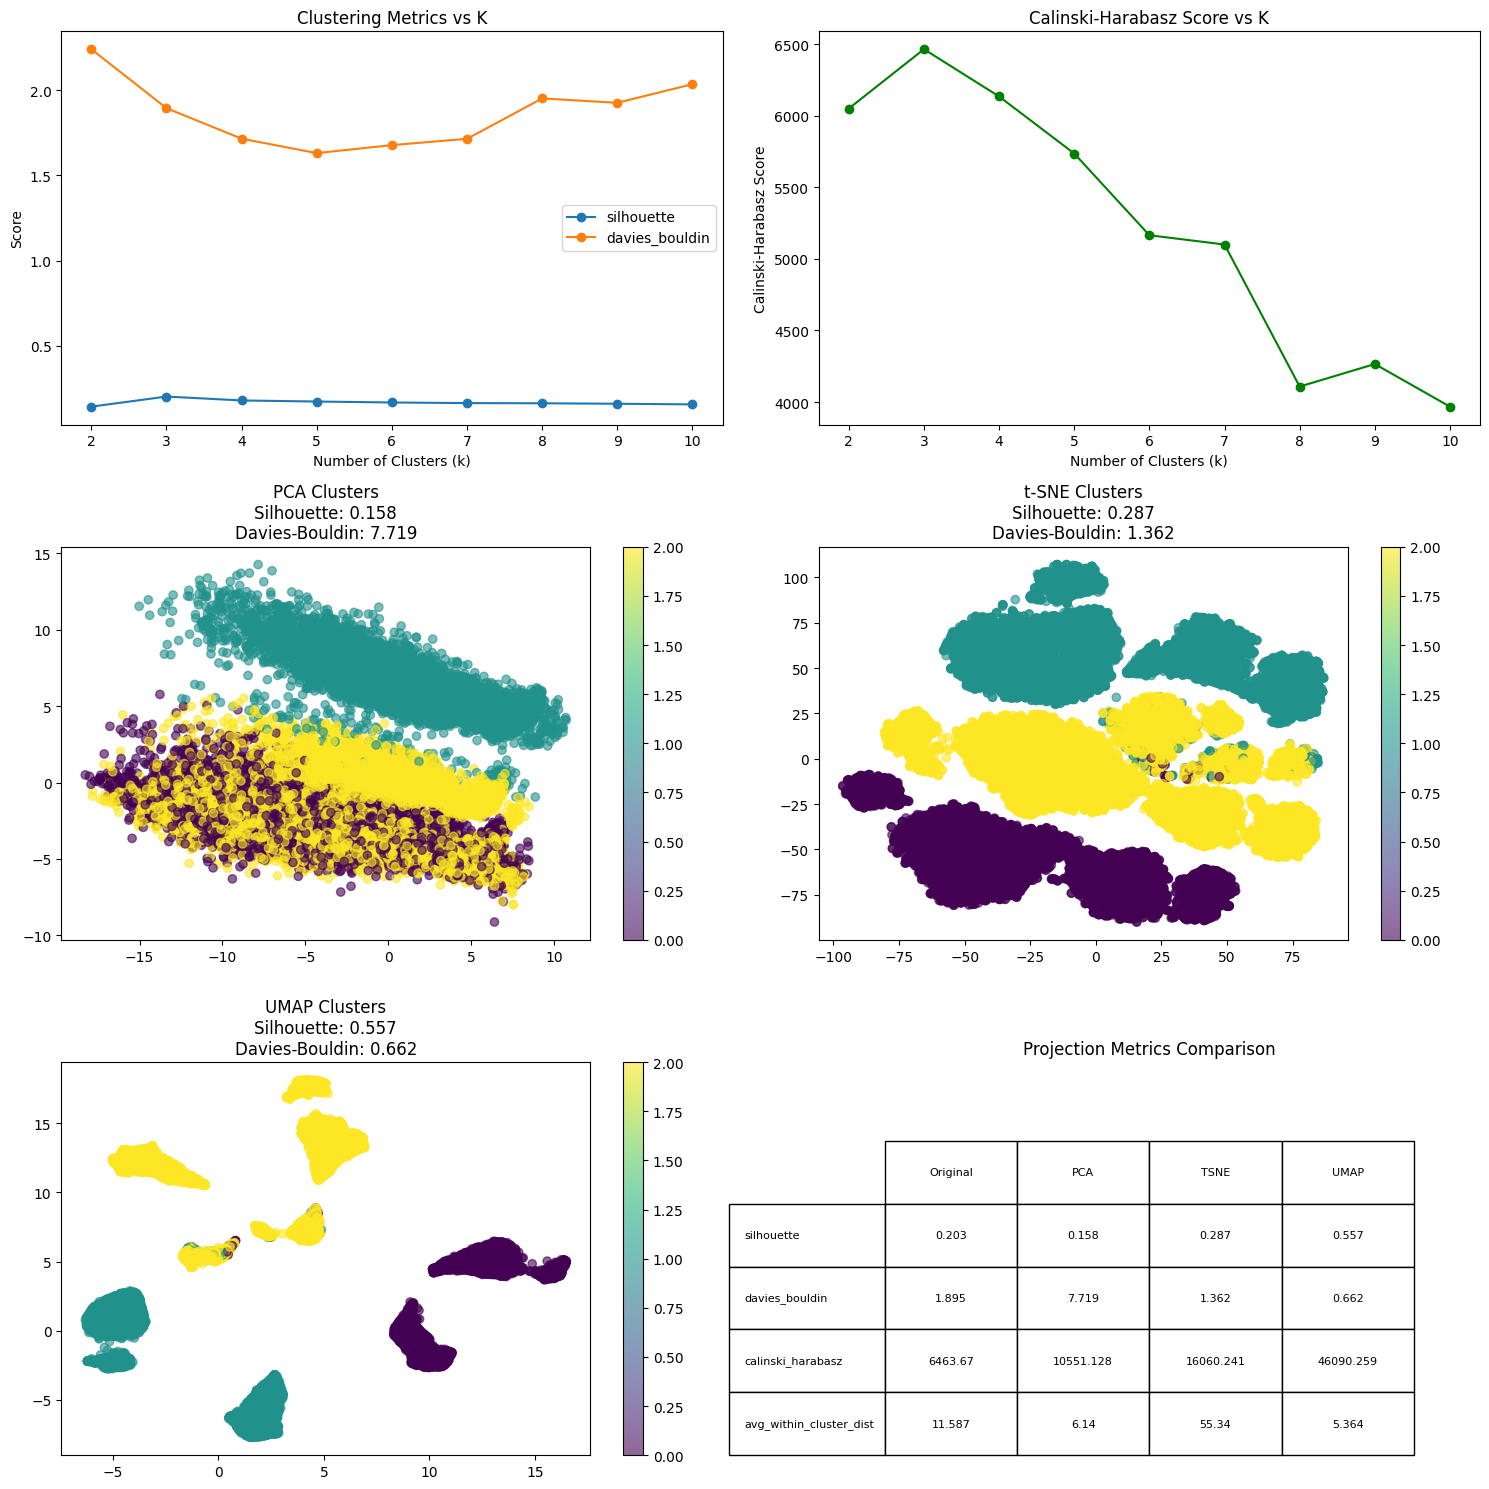


Optimal number of clusters: 3

Projection Metrics:
                         Original        PCA       TSNE       UMAP
silhouette                  0.203      0.158      0.287      0.557
davies_bouldin              1.895      7.719      1.362      0.662
calinski_harabasz        6463.670  10551.128  16060.241  46090.259
avg_within_cluster_dist    11.587      6.140     55.340      5.364


In [35]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import (
#     silhouette_score,
#     davies_bouldin_score,
#     calinski_harabasz_score,
#     adjusted_rand_score
# )
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import umap.umap_ as umap
# from scipy.spatial.distance import cdist

# def calculate_clustering_metrics(data, labels):
#     """
#     Calculate various clustering quality metrics.

#     Parameters:
#     -----------
#     data : array-like
#         The input data
#     labels : array-like
#         Cluster labels

#     Returns:
#     --------
#     dict
#         Dictionary containing various clustering metrics
#     """
#     metrics = {
#         'silhouette': silhouette_score(data, labels),
#         'davies_bouldin': davies_bouldin_score(data, labels),
#         'calinski_harabasz': calinski_harabasz_score(data, labels)
#     }

#     # Calculate average within-cluster distance
#     unique_labels = np.unique(labels)
#     within_distances = []

#     for label in unique_labels:
#         cluster_points = data[labels == label]
#         if len(cluster_points) > 1:  # Need at least 2 points to calculate distances
#             distances = cdist(cluster_points, cluster_points)
#             within_distances.append(np.mean(distances))

#     metrics['avg_within_cluster_dist'] = np.mean(within_distances)

#     return metrics

# def perform_enhanced_clustering_analysis(encoded_data, reconstruction_error=None, figsize=(15, 15)):
#     """
#     Perform comprehensive clustering analysis using K-means, with visualizations using
#     PCA, t-SNE, and UMAP, including multiple quality metrics.

#     Parameters:
#     -----------
#     encoded_data : array-like
#         The encoded data to analyze
#     reconstruction_error : array-like, optional
#         Reconstruction error for each data point
#     figsize : tuple, optional
#         Figure size for the plots

#     Returns:
#     --------
#     dict
#         Dictionary containing clustering results and visualization data
#     """

#     # Determine optimal number of clusters using multiple metrics
#     metrics_by_k = []
#     K = range(2, 11)

#     for k in K:
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         labels = kmeans.fit_predict(encoded_data)
#         metrics = calculate_clustering_metrics(encoded_data, labels)
#         metrics_by_k.append(metrics)

#     # Convert metrics to dataframe for easy plotting
#     metrics_df = pd.DataFrame(metrics_by_k, index=list(K))

#     # Find optimal k using silhouette score
#     optimal_k = K[np.argmax([m['silhouette'] for m in metrics_by_k])]

#     # Perform final clustering with optimal k
#     kmeans = KMeans(n_clusters=optimal_k, random_state=42)
#     clusters = kmeans.fit_predict(encoded_data)

#     # Dimensionality reduction
#     pca = PCA(n_components=2)
#     pca_result = pca.fit_transform(encoded_data)

#     tsne = TSNE(n_components=2, random_state=42, perplexity=30)
#     tsne_result = tsne.fit_transform(encoded_data)

#     umap_reducer = umap.UMAP(
#         n_components=2,
#         random_state=42,
#         n_neighbors=15,
#         min_dist=0.1
#     )
#     umap_result = umap_reducer.fit_transform(encoded_data)

#     # Calculate metrics for each projection
#     projection_metrics = {
#         'Original': calculate_clustering_metrics(encoded_data, clusters),
#         'PCA': calculate_clustering_metrics(pca_result, clusters),
#         'TSNE': calculate_clustering_metrics(tsne_result, clusters),
#         'UMAP': calculate_clustering_metrics(umap_result, clusters)
#     }

#     # Create visualization plots
#     fig = plt.figure(figsize=figsize)

#     # Plot 1: Clustering Metrics vs K
#     plt.subplot(3, 2, 1)
#     for metric in ['silhouette', 'davies_bouldin']:
#         plt.plot(K, metrics_df[metric], 'o-', label=metric)
#     plt.xlabel('Number of Clusters (k)')
#     plt.ylabel('Score')
#     plt.title('Clustering Metrics vs K')
#     plt.legend()

#     # Plot 2: Calinski-Harabasz Score vs K
#     plt.subplot(3, 2, 2)
#     plt.plot(K, metrics_df['calinski_harabasz'], 'o-', color='green')
#     plt.xlabel('Number of Clusters (k)')
#     plt.ylabel('Calinski-Harabasz Score')
#     plt.title('Calinski-Harabasz Score vs K')

#     # Plot 3: PCA
#     plt.subplot(3, 2, 3)
#     scatter_pca = plt.scatter(pca_result[:, 0], pca_result[:, 1],
#                             c=clusters, cmap='viridis', alpha=0.6)
#     plt.colorbar(scatter_pca)
#     plt.title(f'PCA Clusters\nSilhouette: {projection_metrics["PCA"]["silhouette"]:.3f}\n'
#               f'Davies-Bouldin: {projection_metrics["PCA"]["davies_bouldin"]:.3f}')

#     # Plot 4: t-SNE
#     plt.subplot(3, 2, 4)
#     scatter_tsne = plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
#                              c=clusters, cmap='viridis', alpha=0.6)
#     plt.colorbar(scatter_tsne)
#     plt.title(f't-SNE Clusters\nSilhouette: {projection_metrics["TSNE"]["silhouette"]:.3f}\n'
#               f'Davies-Bouldin: {projection_metrics["TSNE"]["davies_bouldin"]:.3f}')

#     # Plot 5: UMAP
#     plt.subplot(3, 2, 5)
#     scatter_umap = plt.scatter(umap_result[:, 0], umap_result[:, 1],
#                              c=clusters, cmap='viridis', alpha=0.6)
#     plt.colorbar(scatter_umap)
#     plt.title(f'UMAP Clusters\nSilhouette: {projection_metrics["UMAP"]["silhouette"]:.3f}\n'
#               f'Davies-Bouldin: {projection_metrics["UMAP"]["davies_bouldin"]:.3f}')

#     # Plot 6: Metrics Comparison
#     plt.subplot(3, 2, 6)
#     metrics_comparison = pd.DataFrame(projection_metrics).round(3)
#     plt.axis('off')
#     plt.title('Projection Metrics Comparison')
#     table = plt.table(
#         cellText=metrics_comparison.values,
#         rowLabels=metrics_comparison.index,
#         colLabels=metrics_comparison.columns,
#         cellLoc='center',
#         loc='center',
#         bbox=[0.1, 0.0, 0.8, 0.8]
#     )
#     table.auto_set_font_size(False)
#     table.set_fontsize(8)

#     plt.tight_layout()
#     plt.show()

#     # Print clustering results
#     print(f"\nOptimal number of clusters: {optimal_k}")
#     print("\nProjection Metrics:")
#     print(metrics_comparison)

#     # Create results dataframe
#     encoded_cols = [f'encoded_dim_{i}' for i in range(encoded_data.shape[1])]
#     results_df = pd.DataFrame(encoded_data, columns=encoded_cols)
#     results_df['cluster'] = clusters
#     if reconstruction_error is not None:
#         results_df['reconstruction_error'] = reconstruction_error

#     return {
#         'clustering_df': results_df,
#         'optimal_k': optimal_k,
#         'projection_metrics': projection_metrics,
#         'metrics_by_k': metrics_df,
#         'pca_result': pca_result,
#         'tsne_result': tsne_result,
#         'umap_result': umap_result,
#         'clusters': clusters
#     }

# # Example usage:
# if __name__ == "__main__":
#     # Assuming you have encoded_data and reconstruction_error from your autoencoder
#     results = perform_enhanced_clustering_analysis(
#         encoded_data=encoded_data,
#         reconstruction_error=reconstruction_error
#     )

In [28]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


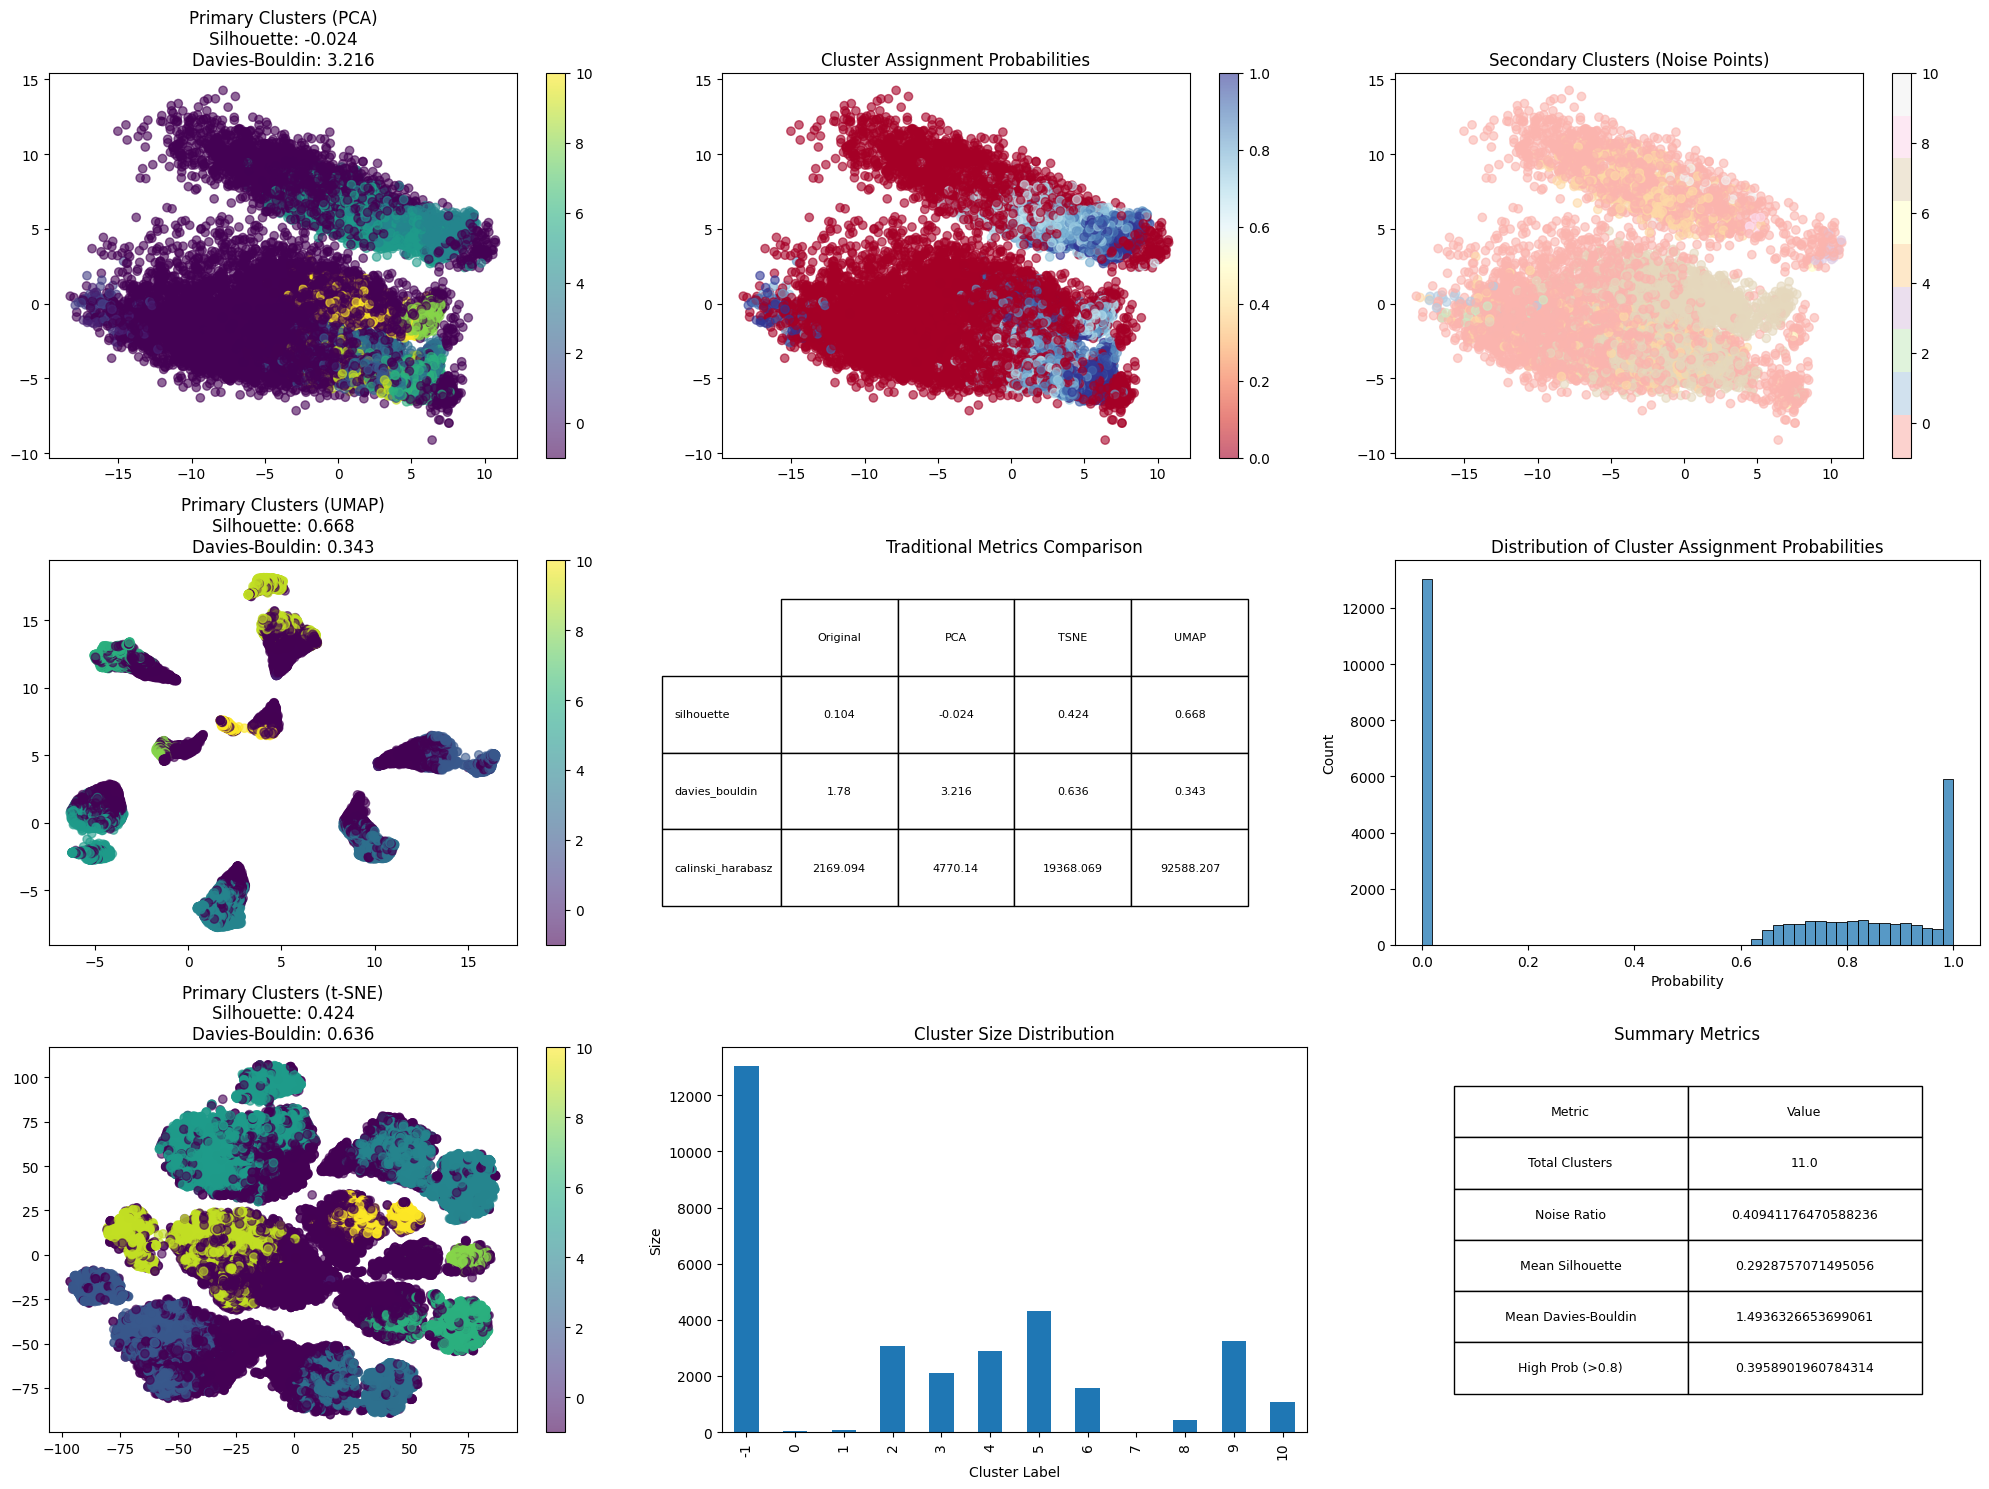


Detailed Metrics Summary:

Traditional Metrics by Projection:
                   Original       PCA       TSNE       UMAP
silhouette            0.104    -0.024      0.424      0.668
davies_bouldin        1.780     3.216      0.636      0.343
calinski_harabasz  2169.094  4770.140  19368.069  92588.207

Summary Metrics:
Total Clusters: 11.000
Noise Ratio: 0.409
Mean Silhouette: 0.293
Mean Davies-Bouldin: 1.494
High Prob (>0.8): 0.396


In [36]:
def perform_combined_clustering_analysis(encoded_data, figsize=(20, 15)):
    """
    Perform both traditional and advanced clustering analysis with refined parameters.
    """
    # 1. Primary Clustering with refined parameters
    primary_clusterer = hdbscan.HDBSCAN(
        min_cluster_size=20,
        min_samples=10,
        cluster_selection_epsilon=0.12,
        alpha=1.2,
        cluster_selection_method='eom',
        prediction_data=True
    )

    primary_clusters = primary_clusterer.fit_predict(encoded_data)
    probabilities = primary_clusterer.probabilities_

    # 2. Secondary Clustering on Noise Points
    noise_points = encoded_data[primary_clusters == -1]
    noise_indices = np.where(primary_clusters == -1)[0]

    secondary_clusterer = hdbscan.HDBSCAN(
        min_cluster_size=10,
        min_samples=5,
        prediction_data=True
    )

    if len(noise_points) > 0:
        secondary_clusters = secondary_clusterer.fit_predict(noise_points)
        secondary_probabilities = secondary_clusterer.probabilities_
    else:
        secondary_clusters = np.array([])
        secondary_probabilities = np.array([])

    # Dimensionality reduction
    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2, random_state=42)
    umap_reducer = umap.UMAP(random_state=42)

    pca_result = pca.fit_transform(encoded_data)
    tsne_result = tsne.fit_transform(encoded_data)
    umap_result = umap_reducer.fit_transform(encoded_data)

    # Calculate traditional metrics for each projection
    valid_mask = primary_clusters != -1
    traditional_metrics = {}

    for name, data in [('Original', encoded_data), ('PCA', pca_result),
                      ('TSNE', tsne_result), ('UMAP', umap_result)]:
        if sum(valid_mask) >= 2:
            filtered_data = data[valid_mask]
            filtered_labels = primary_clusters[valid_mask]

            traditional_metrics[name] = {
                'silhouette': silhouette_score(filtered_data, filtered_labels),
                'davies_bouldin': davies_bouldin_score(filtered_data, filtered_labels),
                'calinski_harabasz': calinski_harabasz_score(filtered_data, filtered_labels)
            }

    # Create visualizations (same as before)
    fig = plt.figure(figsize=figsize)

    # Plot 1: Primary Clusters (PCA)
    plt.subplot(3, 3, 1)
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                         c=primary_clusters, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    metrics_text = f"Silhouette: {traditional_metrics['PCA']['silhouette']:.3f}\n"
    metrics_text += f"Davies-Bouldin: {traditional_metrics['PCA']['davies_bouldin']:.3f}"
    plt.title(f'Primary Clusters (PCA)\n{metrics_text}')

    # Plot 2: Cluster Probabilities
    plt.subplot(3, 3, 2)
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                         c=probabilities, cmap='RdYlBu', alpha=0.6)
    plt.colorbar(scatter)
    plt.title('Cluster Assignment Probabilities')

    # Plot 3: Secondary Clusters (Noise Analysis)
    plt.subplot(3, 3, 3)
    if len(noise_points) > 0:
        noise_pca = pca_result[primary_clusters == -1]
        scatter = plt.scatter(noise_pca[:, 0], noise_pca[:, 1],
                            c=secondary_clusters, cmap='Pastel1', alpha=0.6)
        plt.colorbar(scatter)
    plt.title('Secondary Clusters (Noise Points)')

    # Plot 4: UMAP visualization
    plt.subplot(3, 3, 4)
    scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1],
                         c=primary_clusters, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    metrics_text = f"Silhouette: {traditional_metrics['UMAP']['silhouette']:.3f}\n"
    metrics_text += f"Davies-Bouldin: {traditional_metrics['UMAP']['davies_bouldin']:.3f}"
    plt.title(f'Primary Clusters (UMAP)\n{metrics_text}')

    # Plot 5: Traditional Metrics Comparison
    plt.subplot(3, 3, 5)
    metrics_df = pd.DataFrame(traditional_metrics).round(3)
    plt.axis('off')
    table = plt.table(
        cellText=metrics_df.values,
        rowLabels=metrics_df.index,
        colLabels=metrics_df.columns,
        cellLoc='center',
        loc='center',
        bbox=[0.1, 0.1, 0.8, 0.8]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    plt.title('Traditional Metrics Comparison')

    # Plot 6: Probability Distribution
    plt.subplot(3, 3, 6)
    sns.histplot(probabilities, bins=50)
    plt.title('Distribution of Cluster Assignment Probabilities')
    plt.xlabel('Probability')
    plt.ylabel('Count')

    # Plot 7: t-SNE visualization
    plt.subplot(3, 3, 7)
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
                         c=primary_clusters, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    metrics_text = f"Silhouette: {traditional_metrics['TSNE']['silhouette']:.3f}\n"
    metrics_text += f"Davies-Bouldin: {traditional_metrics['TSNE']['davies_bouldin']:.3f}"
    plt.title(f'Primary Clusters (t-SNE)\n{metrics_text}')

    # Plot 8: Cluster Sizes
    plt.subplot(3, 3, 8)
    cluster_sizes = pd.Series(primary_clusters).value_counts().sort_index()
    cluster_sizes.plot(kind='bar')
    plt.title('Cluster Size Distribution')
    plt.xlabel('Cluster Label')
    plt.ylabel('Size')

    # Plot 9: Summary Metrics
    plt.subplot(3, 3, 9)
    plt.axis('off')
    summary_metrics = {
        'Total Clusters': len(np.unique(primary_clusters)) - 1,  # Excluding noise
        'Noise Ratio': sum(primary_clusters == -1) / len(primary_clusters),
        'Mean Silhouette': np.mean([m['silhouette'] for m in traditional_metrics.values()]),
        'Mean Davies-Bouldin': np.mean([m['davies_bouldin'] for m in traditional_metrics.values()]),
        'High Prob (>0.8)': sum(probabilities > 0.8) / len(probabilities)
    }
    summary_df = pd.DataFrame(list(summary_metrics.items()), columns=['Metric', 'Value'])
    table = plt.table(
        cellText=summary_df.values,
        colLabels=summary_df.columns,
        cellLoc='center',
        loc='center',
        bbox=[0.1, 0.1, 0.8, 0.8]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    plt.title('Summary Metrics')

    plt.tight_layout()
    plt.show()

    return {
        'primary_clusters': primary_clusters,
        'probabilities': probabilities,
        'traditional_metrics': traditional_metrics,
        'summary_metrics': summary_metrics,
        'secondary_clusters': secondary_clusters,
        'projections': {
            'pca': pca_result,
            'tsne': tsne_result,
            'umap': umap_result
        }
    }

# Example usage:
results = perform_combined_clustering_analysis(encoded_data)

# Print detailed metrics summary
print("\nDetailed Metrics Summary:")
print("\nTraditional Metrics by Projection:")
print(pd.DataFrame(results['traditional_metrics']).round(3))
print("\nSummary Metrics:")
for metric, value in results['summary_metrics'].items():
    print(f"{metric}: {value:.3f}")

In [39]:
clustering_df

encoded_dim_0  encoded_dim_1  encoded_dim_2  encoded_dim_3  \
0           6.715020       1.845106      -0.224376       4.961980   
1           4.539176       4.259938      -0.520046       4.913653   
2           0.393389       6.554179      -1.206140      -0.012249   
3           4.960426       1.968717      -0.509269       0.773059   
4           6.043783       0.188207       0.310571      -0.098165   
...              ...            ...            ...            ...   
31870      -1.272206      -2.498667       5.129083       8.711283   
31871      -1.640831      -2.401965       5.159473       8.120577   
31872      -1.406174      -2.137281       5.391966       8.797237   
31873      -1.675223      -1.978775       4.688550       8.087383   
31874      -1.462536      -1.517242       3.057671       7.343866   

       encoded_dim_4  encoded_dim_5  encoded_dim_6  encoded_dim_7  \
0           0.126324       2.426260      -0.385905       8.506773   
1           0.768076       1.998557       3.976483       5.901826   
2           1.863511       2.073354       4.034415       7.634475   
3           0.802797       2.770023       1.972744       8.082292   
4          -0.037952       2.759797       4.237438      10.078337   
...              ...            ...            ...            ...   
31870      -0.144766       0.748036      -0.006678      -2.698439   
31871      -0.315162       0.712018      -0.123596      -2.328136   
31872      -0.297407       0.710801      -0.021872      -2.436277   
31873      -0.371931       0.483008       2.536277      -2.658460   
31874      -0.185993       1.089029      -0.093844      -1.857616   

       encoded_dim_8  encoded_dim_9  encoded_dim_10  encoded_dim_11  \
0          -0.366045       7.630444        1.458569        5.015920   
1           0.701214      -0.101074       -0.306988        5.127329   
2           0.510336      -1.294295       -1.632707        5.743684   
3           3.127885      -1.220508       -0.469929        4.725265   
4           0.147044      -1.938279        0.945341        5.243267   
...              ...            ...             ...             ...   
31870       3.126625      -1.950781       -0.219418        6.064022   
31871       0.600231      -1.923380       -0.192521        5.981513   
31872       0.764068      -1.446017       -0.062732        5.848371   
31873       1.111599      -1.680078       -0.622117        6.084352   
31874      -0.065279      -1.712339       -1.346724        5.477718   

       encoded_dim_12  encoded_dim_13  encoded_dim_14  encoded_dim_15  \
0            3.491399        1.756939       -0.012803        2.195003   
1            9.058110        2.512143       -1.810360        4.788828   
2           -0.254859        2.764305        2.710784        4.846141   
3           -0.169707        1.193477        3.104542        2.177448   
4           -0.130499        0.376279        2.734478       -0.083791   
...               ...             ...             ...             ...   
31870        6.842169       -0.062492        0.194037        6.946434   
31871        7.577663       -0.122238        0.608404        1.961718   
31872        7.528177       -0.137897       -0.040958       -0.383218   
31873        7.428443       -0.135890        0.129472        4.707502   
31874       -1.760024       -0.222773        7.977467       -0.397117   

       cluster  reconstruction_error  
0            0              0.004109  
1            1              0.002921  
2            2              0.001433  
3            2              0.000451  
4            2              0.001734  
...        ...                   ...  
31870        1              0.014334  
31871        1              0.015963  
31872        1              0.015252  
31873        1              0.014228  
31874        2              0.014498  

[31875 rows x 18 columns]

In [37]:
def analyze_clusters(data_encoded, clustering_df):
    """
    Analyze characteristics of clusters in the encoded dataset

    Parameters:
    data_encoded: DataFrame with original numerical features
    clustering_df: DataFrame with cluster assignments
    """
    analysis_df = df_encoded.copy()
    analysis_df['cluster'] = clustering_df['cluster']

    # Calculate summary statistics for each cluster
    cluster_stats = []
    for cluster in sorted(analysis_df['cluster'].unique()):
        cluster_data = analysis_df[analysis_df['cluster'] == cluster]

        stats = {
            'cluster': cluster,
            'size': len(cluster_data),
            'size_percent': len(cluster_data) / len(analysis_df) * 100
        }

        # Get statistics for all columns except cluster
        for col in df_encoded.columns:
            stats[f'{col}_mean'] = cluster_data[col].mean()
            stats[f'{col}_std'] = cluster_data[col].std()
            stats[f'{col}_median'] = cluster_data[col].median()

        cluster_stats.append(stats)

    summary_df = pd.DataFrame(cluster_stats)

    # Identify distinguishing features
    print("\nDistinguishing Features by Cluster:")
    for cluster in sorted(analysis_df['cluster'].unique()):
        cluster_data = analysis_df[analysis_df['cluster'] == cluster]
        other_data = analysis_df[analysis_df['cluster'] != cluster]

        print(f"\nCluster {cluster}:")
        for col in data_encoded.columns:
            cluster_mean = cluster_data[col].mean()
            other_mean = other_data[col].mean()
            diff_percent = ((cluster_mean - other_mean) / other_mean) * 100
            if abs(diff_percent) > 20:  # Show features with >20% difference
                print(f"{col}: {diff_percent:.1f}% different from other clusters")

    return summary_df

# Run analysis
summary_df = analyze_clusters(df_encoded, clustering_df)
print("\nDetailed Cluster Summary:")
print(summary_df.to_string())


Distinguishing Features by Cluster:

Cluster 0:
vendor_count: 33.1% different from other clusters
product_count: 31.1% different from other clusters
is_chain: 112.2% different from other clusters
DOW_0: 30.9% different from other clusters
DOW_1: 34.6% different from other clusters
DOW_2: 36.0% different from other clusters
DOW_3: 31.0% different from other clusters
DOW_4: 26.9% different from other clusters
DOW_5: 33.3% different from other clusters
DOW_6: 37.5% different from other clusters
Total_Orders_Per_Client: 32.8% different from other clusters
mnt: -44.8% different from other clusters
mnt_Per_Order: -60.3% different from other clusters
Orders_Night: -61.8% different from other clusters
Orders_Dawn: -84.8% different from other clusters
Orders_Afternoon: 61.0% different from other clusters
Orders_Evening: 72.2% different from other clusters
Orders_Dusk: 343.4% different from other clusters
Region_8670: -100.0% different from other clusters
Region_4660: -100.0% different from oth

<ipython-input-37-b1a53431ced0>:43: RuntimeWarning: divide by zero encountered in scalar divide
  diff_percent = ((cluster_mean - other_mean) / other_mean) * 100


Key insights and recommendations based on current clusters:

Cluster 0 (Value Seekers):


Low spending (-67.2% mnt)
High cash usage (+28.8%)
Evening preference
Add: Price sensitivity analysis, promotion response rate


Cluster 1 (Occasional Users):


Lower engagement (-50.3% product_count)
Specific region focus (Region 4660)
Add: Churn risk scoring, reactivation potential


Cluster 2 (Power Users):


High diversity (+218% vendor_count)
High frequency (+375% orders)
Add: Brand advocacy potential, cross-selling opportunities


Cluster 3 (Premium Segment):


High average order value (+106.9% mnt_Per_Order)
Distinct time preferences (night/dawn)
Add: Premium service adoption rate, loyalty program analysis

Encoded data statistics:
Mean: [3.1476245 4.7139654 2.4378128 4.0374303 4.476392  1.6401672 2.3331006
 1.6929771 4.343987  2.5202532 2.8869078 3.26542   1.6687355 2.092933
 2.8821838 1.0651592]
Standard deviation: [2.4263296 1.9436604 2.7259026 2.0649035 2.003759  2.4225013 4.7556176
 2.395392  1.6443061 1.8679523 5.1345906 3.1351044 2.3832974 2.861697
 4.1110306 1.9517041]
Correlation matrix:
[[ 1.          0.29133415 -0.35088243  0.41004663  0.29900614 -0.08301041
   0.14557467  0.43088913  0.22049626  0.17749207  0.07007496  0.30778583
   0.36798072 -0.44531726  0.60722539 -0.13204985]
 [ 0.29133415  1.         -0.26903004  0.2825422   0.39144707 -0.08941098
   0.08759899  0.18262422  0.06344309  0.13782898  0.00391792  0.12692244
   0.1555797  -0.48396461  0.14150432 -0.18053437]
 [-0.35088243 -0.26903004  1.         -0.31661836 -0.23845347  0.08589871
  -0.2550777  -0.352966   -0.18116215 -0.17964842 -0.10166783 -0.38679859
  -0.29081013  0.35292122 -0.35023317  0.12497563]
 [ 0.4

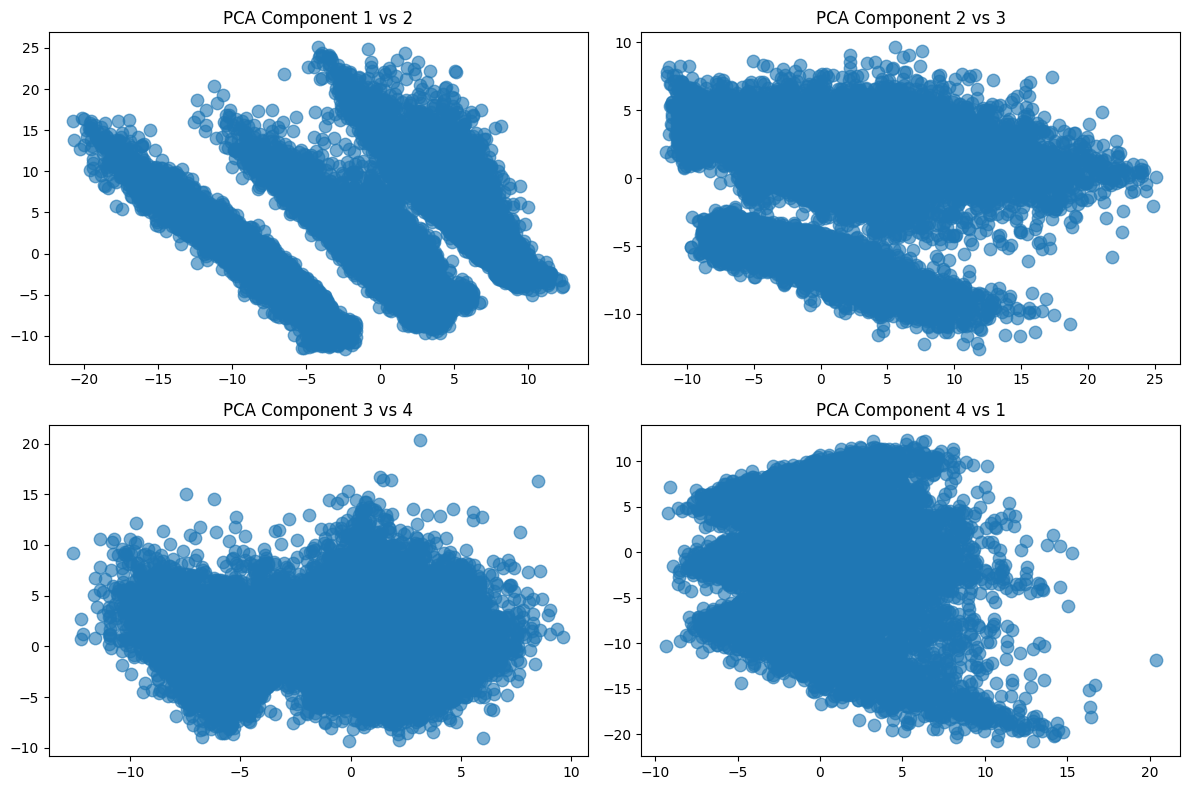


Correlations between original features and encoded features:
Feature Unnamed: 0 vs Encoded Feature 0: -0.431
Feature Unnamed: 0 vs Encoded Feature 1: -0.599
Feature Unnamed: 0 vs Encoded Feature 2: 0.320
Feature Unnamed: 0 vs Encoded Feature 3: -0.442
Feature vendor_count vs Encoded Feature 0: 0.408
Feature vendor_count vs Encoded Feature 1: 0.105
Feature vendor_count vs Encoded Feature 2: -0.415
Feature vendor_count vs Encoded Feature 3: 0.336
Feature product_count vs Encoded Feature 0: 0.687
Feature product_count vs Encoded Feature 1: 0.180
Feature product_count vs Encoded Feature 2: -0.341
Feature product_count vs Encoded Feature 3: 0.344
Feature is_chain vs Encoded Feature 0: 0.542
Feature is_chain vs Encoded Feature 1: 0.212
Feature is_chain vs Encoded Feature 2: -0.551
Feature is_chain vs Encoded Feature 3: 0.312
Feature DOW_0 vs Encoded Feature 0: 0.360
Feature DOW_0 vs Encoded Feature 1: 0.090
Feature DOW_0 vs Encoded Feature 2: -0.239
Feature DOW_0 vs Encoded Feature 3: 0.110

<ipython-input-24-fbba5b3c41aa>:37: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(df_scaled[col], encoded_data[:, j])


In [24]:
# Second script: Additional analysis on the autoencoder results
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Print summary statistics of the 4D encoded data
print("Encoded data statistics:")
print(f"Mean: {np.mean(encoded_data, axis=0)}")
print(f"Standard deviation: {np.std(encoded_data, axis=0)}")
print(f"Correlation matrix:\n{np.corrcoef(encoded_data.T)}")

# Perform PCA on the encoded data
pca = PCA(n_components=4)
pca_data = pca.fit_transform(encoded_data)

# Explain variance ratio of PCA components
print("\nPCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plot PCA components
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(4):
    axes[i].scatter(pca_data[:, i], pca_data[:, (i+1)%4], alpha=0.6, s=80)
    axes[i].set_title(f"PCA Component {i+1} vs {(i+1)%4+1}")

plt.tight_layout()
plt.show()

# Check for correlations between original features and encoded features
print("\nCorrelations between original features and encoded features:")
for i, col in enumerate(df_scaled.columns):
    for j in range(4):
        corr, _ = pearsonr(df_scaled[col], encoded_data[:, j])
        print(f"Feature {col} vs Encoded Feature {j}: {corr:.3f}")

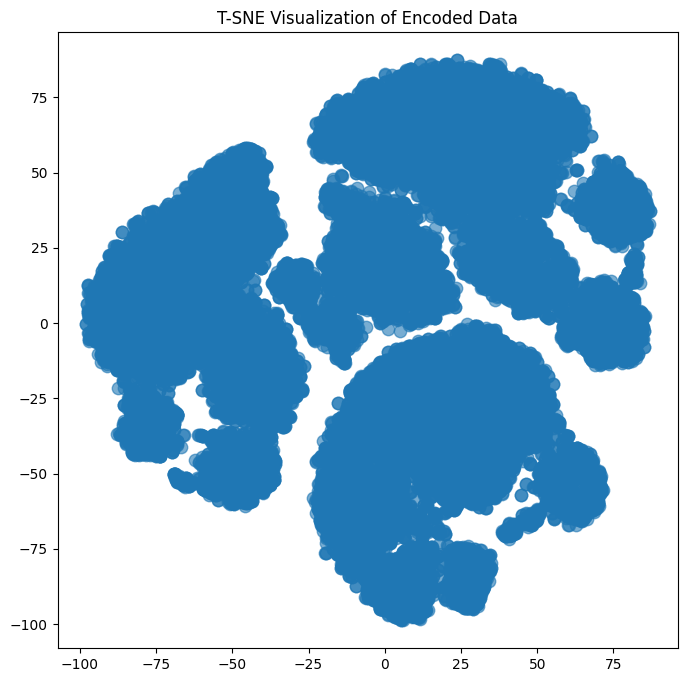

ValueError: Input contains NaN.

In [25]:
# T-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(encoded_data)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.6, s=80)
ax.set_title("T-SNE Visualization of Encoded Data")
plt.show()

# UMAP visualization
umap_data = umap.UMAP(n_components=2, random_state=42).fit_transform(df_encoded)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(umap_data[:, 0], umap_data[:, 1], alpha=0.6, s=80)
ax.set_title("UMAP Visualization of Encoded Data")
plt.show()

<ipython-input-38-5e477c4527ff>:30: RuntimeWarning: divide by zero encountered in scalar divide
  'pct_diff': ((cluster_data[metric].mean() -
<ipython-input-38-5e477c4527ff>:30: RuntimeWarning: divide by zero encountered in scalar divide
  'pct_diff': ((cluster_data[metric].mean() -
<ipython-input-38-5e477c4527ff>:30: RuntimeWarning: divide by zero encountered in scalar divide
  'pct_diff': ((cluster_data[metric].mean() -
<ipython-input-38-5e477c4527ff>:148: RuntimeWarning: divide by zero encountered in scalar divide
  'pct_diff': ((cluster_data[metric].mean() -



Cluster_0 Key Metrics:
Peak Period: Orders_Evening
Peak Period Concentration: 0.359

Regional Distribution:
Region_8670_concentration: 0.000
Region_4660_concentration: 0.000
Region_2360_concentration: 0.988
Region_Other_concentration: 0.009

Other Metrics:
vendor_diversity: 0.840
product_variety: 1.729
avg_monthly_spend: 1.901
spend_per_order_ratio: 0.406
weekend_ratio: 0.315

Cluster_1 Key Metrics:
Peak Period: Orders_Morning
Peak Period Concentration: 0.326

Regional Distribution:
Region_8670_concentration: 0.977
Region_4660_concentration: 0.000
Region_2360_concentration: 0.000
Region_Other_concentration: 0.014

Other Metrics:
vendor_diversity: 0.897
product_variety: 1.677
avg_monthly_spend: 7.039
spend_per_order_ratio: 0.483
weekend_ratio: 0.304

Cluster_2 Key Metrics:
Peak Period: Orders_Evening
Peak Period Concentration: 0.428

Regional Distribution:
Region_8670_concentration: 0.000
Region_4660_concentration: 0.738
Region_2360_concentration: 0.000
Region_Other_concentration: 0.20

<ipython-input-38-5e477c4527ff>:148: RuntimeWarning: divide by zero encountered in scalar divide
  'pct_diff': ((cluster_data[metric].mean() -
<ipython-input-38-5e477c4527ff>:148: RuntimeWarning: divide by zero encountered in scalar divide
  'pct_diff': ((cluster_data[metric].mean() -



Cluster_0 Key Metrics:
vendor_diversity: 0.840
product_variety: 1.729
avg_monthly_spend: 1.901
weekend_ratio: 0.315
region_concentration: 0.997

Cluster_1 Key Metrics:
vendor_diversity: 0.897
product_variety: 1.677
avg_monthly_spend: 7.039
weekend_ratio: 0.304
region_concentration: 0.991

Cluster_2 Key Metrics:
vendor_diversity: 0.792
product_variety: 1.926
avg_monthly_spend: 3.979
weekend_ratio: 0.311
region_concentration: 0.941


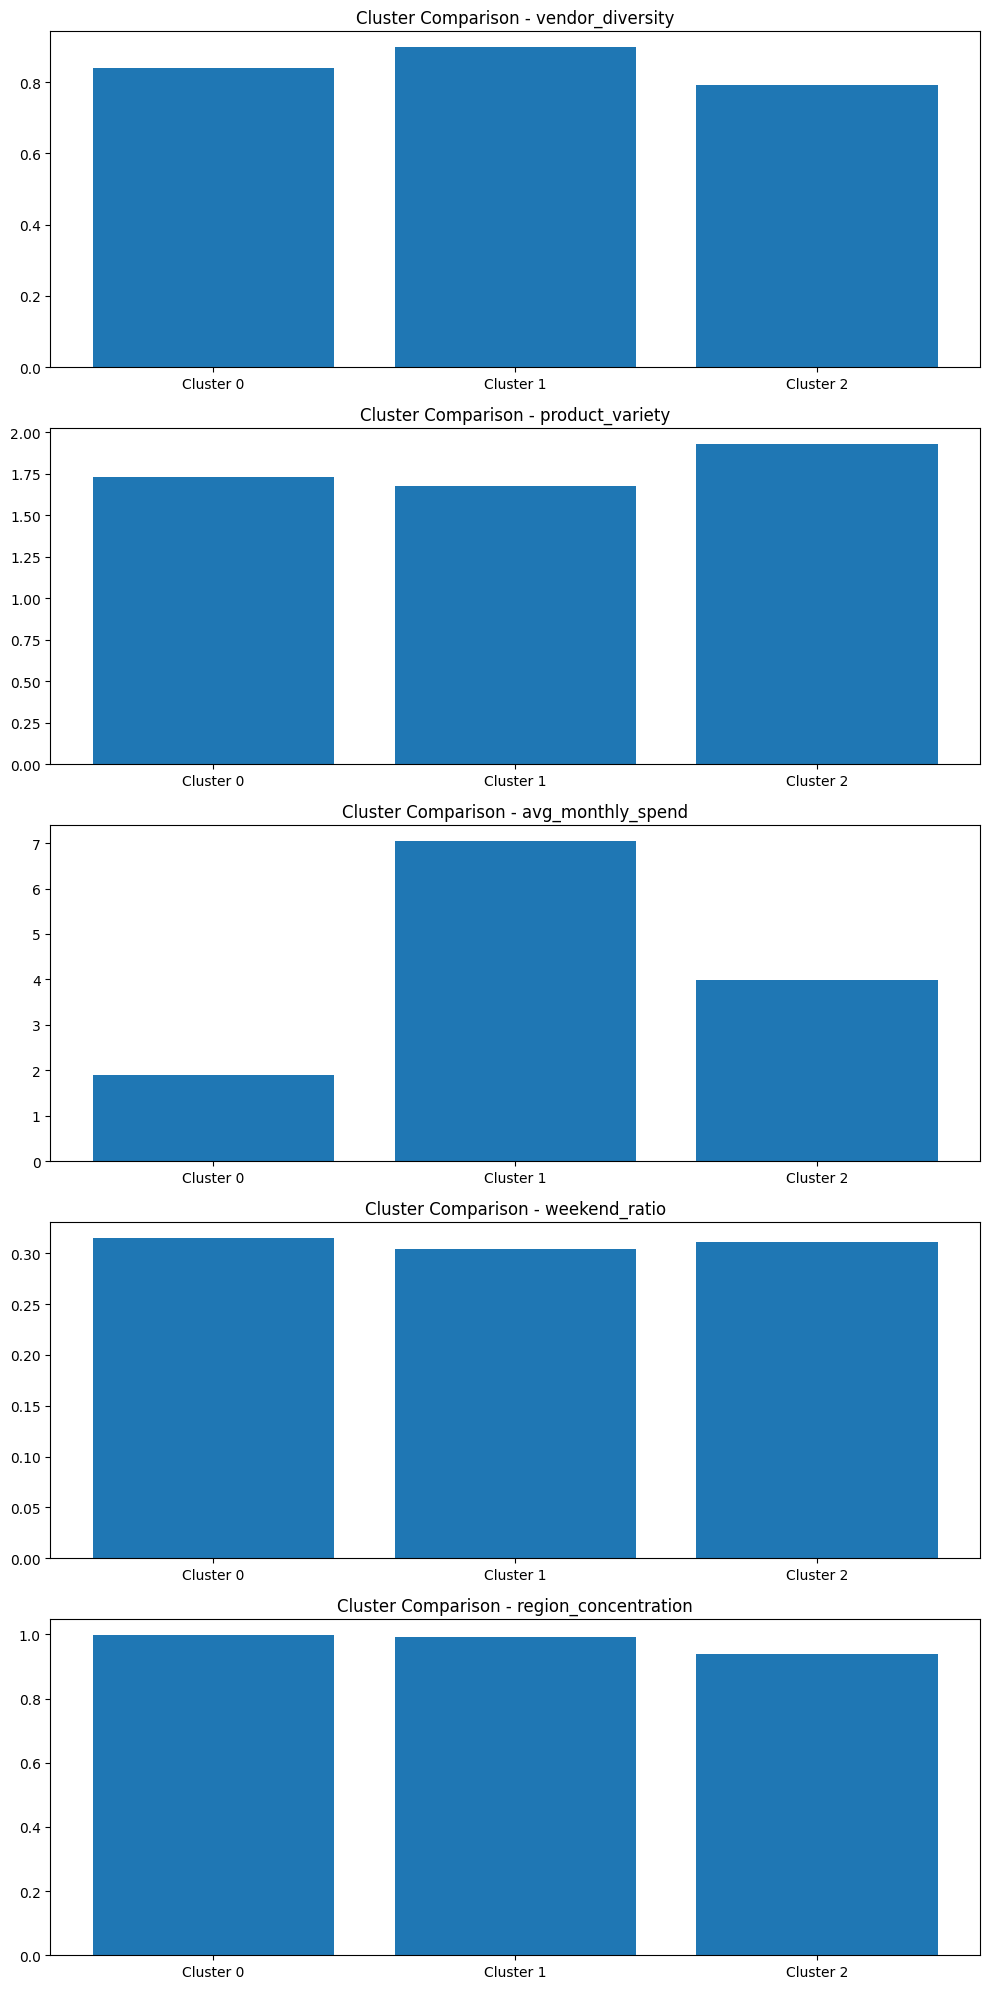

In [38]:
def analyze_clusters_enhanced(df_encoded, clustering_df):
    categories = {
        "Behavioral": ['vendor_count', 'product_count', 'Total_Orders_Per_Client',
                      'Items_Per_Order', 'activity', 'Loyalty', 'frq', 'rcn'],
        "Economic": ['mnt', 'mnt_Per_Order', 'CLV_Score', 'Recency_Score'],
        "Time_Periods": ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
                        'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk'],
        "Days": ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'],
        "Regional": ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other']
    }

    analysis_df = df_encoded.copy()
    analysis_df['cluster'] = clustering_df['cluster']

    results = {'cluster_profiles': {}, 'derived_metrics': {}}

    for cluster in analysis_df['cluster'].unique():
        cluster_data = analysis_df[analysis_df['cluster'] == cluster]
        cluster_profile = {}

        # Basic category statistics
        for category, metrics in categories.items():
            category_stats = {}
            for metric in metrics:
                if metric in cluster_data.columns:
                    stats_dict = {
                        'mean': cluster_data[metric].mean(),
                        'median': cluster_data[metric].median(),
                        'std': cluster_data[metric].std(),
                        'pct_diff': ((cluster_data[metric].mean() -
                                    analysis_df[analysis_df['cluster'] != cluster][metric].mean()) /
                                   analysis_df[analysis_df['cluster'] != cluster][metric].mean() * 100)
                    }
                    category_stats[metric] = stats_dict
            cluster_profile[category] = category_stats

        # Derived metrics
        derived = {}

        # Behavioral metrics
        derived['vendor_diversity'] = (cluster_data['vendor_count'] /
                                     cluster_data['Total_Orders_Per_Client']).mean()
        derived['product_variety'] = (cluster_data['product_count'] /
                                    cluster_data['vendor_count']).mean()

        # Economic metrics
        derived['avg_monthly_spend'] = (cluster_data['mnt'] /
                                      cluster_data['activity']).mean()
        derived['spend_per_order_ratio'] = (cluster_data['mnt_Per_Order'] /
                                          cluster_data['mnt']).mean()

        # Time patterns
        derived['weekend_ratio'] = ((cluster_data['DOW_5'] + cluster_data['DOW_6']).sum() /
                                  cluster_data['Total_Orders_Per_Client'].sum())

        # Time period analysis
        time_periods = ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
                       'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk']
        period_means = cluster_data[time_periods].mean()
        derived['peak_period'] = period_means.idxmax()
        derived['peak_period_concentration'] = period_means.max() / period_means.sum()

        # Regional analysis - individual regions
        for region in ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other']:
            derived[f'{region}_concentration'] = cluster_data[region].mean()

        results['derived_metrics'][f'Cluster_{cluster}'] = derived
        results['cluster_profiles'][f'Cluster_{cluster}'] = cluster_profile

    return results

def plot_cluster_comparisons(results):
    n_clusters = len(results['derived_metrics'])
    metrics = list(list(results['derived_metrics'].values())[0].keys())

    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4*len(metrics)))
    for i, metric in enumerate(metrics):
        values = [cluster_metrics[metric]
                 for cluster_metrics in results['derived_metrics'].values()]
        if isinstance(values[0], str):  # For peak_period which is a string
            continue
        axes[i].bar(range(n_clusters), values)
        axes[i].set_title(f'Cluster Comparison - {metric}')
        axes[i].set_xticks(range(n_clusters))
        axes[i].set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])

    plt.tight_layout()
    plt.show()

# Execute analysis
results = analyze_clusters_enhanced(df_encoded, clustering_df)

# Print summary with time period and region details
for cluster, metrics in results['derived_metrics'].items():
    print(f"\n{cluster} Key Metrics:")
    print(f"Peak Period: {metrics['peak_period']}")
    print(f"Peak Period Concentration: {metrics['peak_period_concentration']:.3f}")
    print("\nRegional Distribution:")
    for key in metrics:
        if 'Region_' in key:
            print(f"{key}: {metrics[key]:.3f}")
    print("\nOther Metrics:")
    for metric, value in metrics.items():
        if 'Region_' not in metric and metric not in ['peak_period', 'peak_period_concentration']:
            print(f"{metric}: {value:.3f}")

# Load required libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_encoded and clustering_df are already loaded
def analyze_clusters_enhanced(df_encoded, clustering_df):
    """
    Comprehensive business analysis of customer clusters
    """
    categories = {
        "Behavioral": ['vendor_count', 'product_count', 'Total_Orders_Per_Client',
                      'Items_Per_Order', 'activity', 'Loyalty', 'frq', 'rcn'],
        "Economic": ['mnt', 'mnt_Per_Order', 'CLV_Score', 'Recency_Score'],
        "Time_Patterns": ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
                         'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk',
                         'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'],
        "Regional": ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other']
    }

    analysis_df = df_encoded.copy()
    analysis_df['cluster'] = clustering_df['cluster']

    # Initialize results dictionary
    results = {'cluster_profiles': {}, 'derived_metrics': {}}

    # Calculate basic statistics for each category and cluster
    for cluster in analysis_df['cluster'].unique():
        cluster_data = analysis_df[analysis_df['cluster'] == cluster]
        cluster_profile = {}

        for category, metrics in categories.items():
            category_stats = {}
            for metric in metrics:
                if metric in cluster_data.columns:
                    stats_dict = {
                        'mean': cluster_data[metric].mean(),
                        'median': cluster_data[metric].median(),
                        'std': cluster_data[metric].std(),
                        'pct_diff': ((cluster_data[metric].mean() -
                                    analysis_df[analysis_df['cluster'] != cluster][metric].mean()) /
                                   analysis_df[analysis_df['cluster'] != cluster][metric].mean() * 100)
                    }
                    category_stats[metric] = stats_dict
            cluster_profile[category] = category_stats

        # Calculate derived metrics
        derived = {}

        # Behavioral metrics
        derived['vendor_diversity'] = (cluster_data['vendor_count'] /
                                     cluster_data['Total_Orders_Per_Client']).mean()
        derived['product_variety'] = (cluster_data['product_count'] /
                                    cluster_data['vendor_count']).mean()

        # Economic metrics
        derived['avg_monthly_spend'] = (cluster_data['mnt'] /
                                      cluster_data['activity']).mean()

        # Time pattern metrics
        derived['weekend_ratio'] = ((cluster_data['DOW_5'] + cluster_data['DOW_6']).sum() /
                                  cluster_data['Total_Orders_Per_Client'].sum())

        # Regional concentration
        region_cols = [col for col in cluster_data.columns if 'Region_' in col]
        derived['region_concentration'] = cluster_data[region_cols].max(axis=1).mean()

        results['derived_metrics'][f'Cluster_{cluster}'] = derived
        results['cluster_profiles'][f'Cluster_{cluster}'] = cluster_profile

    return results

# Execute analysis
results = analyze_clusters_enhanced(df_encoded, clustering_df)

# Print summary
for cluster, metrics in results['derived_metrics'].items():
    print(f"\n{cluster} Key Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")

# Visualization
def plot_cluster_comparisons(results):
    n_clusters = len(results['derived_metrics'])
    metrics = list(list(results['derived_metrics'].values())[0].keys())

    fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 4*len(metrics)))
    for i, metric in enumerate(metrics):
        values = [cluster_metrics[metric]
                 for cluster_metrics in results['derived_metrics'].values()]
        axes[i].bar(range(n_clusters), values)
        axes[i].set_title(f'Cluster Comparison - {metric}')
        axes[i].set_xticks(range(n_clusters))
        axes[i].set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])

    plt.tight_layout()
    plt.show()

plot_cluster_comparisons(results)

In [ ]:
def analyze_clusters_enhanced(df_encoded, clustering_df):
    categories = {
        "Behavioral": ['vendor_count', 'product_count', 'Total_Orders_Per_Client',
                      'Items_Per_Order', 'activity', 'Loyalty', 'frq', 'rcn'],
        "Economic": ['mnt', 'mnt_Per_Order', 'CLV_Score', 'Recency_Score'],
        "Time_Periods": ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
                        'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk'],
        "Days": ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'],
        "Regional": ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other']
    }

    analysis_df = df_encoded.copy()
    analysis_df['cluster'] = clustering_df['cluster']

    results = {'cluster_profiles': {}, 'derived_metrics': {}}

    for cluster in analysis_df['cluster'].unique():
        cluster_data = analysis_df[analysis_df['cluster'] == cluster]
        cluster_profile = {}

        # Basic category statistics
        for category, metrics in categories.items():
            category_stats = {}
            for metric in metrics:
                if metric in cluster_data.columns:
                    stats_dict = {
                        'mean': cluster_data[metric].mean(),
                        'median': cluster_data[metric].median(),
                        'std': cluster_data[metric].std(),
                        'pct_diff': ((cluster_data[metric].mean() -
                                    analysis_df[analysis_df['cluster'] != cluster][metric].mean()) /
                                   analysis_df[analysis_df['cluster'] != cluster][metric].mean() * 100)
                    }
                    category_stats[metric] = stats_dict
            cluster_profile[category] = category_stats

        # Derived metrics
        derived = {}

        # Behavioral metrics
        derived['vendor_diversity'] = (cluster_data['vendor_count'] /
                                     cluster_data['Total_Orders_Per_Client']).mean()
        derived['product_variety'] = (cluster_data['product_count'] /
                                    cluster_data['vendor_count']).mean()

        # Economic metrics
        derived['avg_monthly_spend'] = (cluster_data['mnt'] /
                                      cluster_data['activity']).mean()
        derived['spend_per_order_ratio'] = (cluster_data['mnt_Per_Order'] /
                                          cluster_data['mnt']).mean()

        # Time patterns
        derived['weekend_ratio'] = ((cluster_data['DOW_5'] + cluster_data['DOW_6']).sum() /
                                  cluster_data['Total_Orders_Per_Client'].sum())

        # Time period analysis
        time_periods = ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
                       'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk']
        period_means = cluster_data[time_periods].mean()
        derived['peak_period'] = period_means.idxmax()
        derived['peak_period_concentration'] = period_means.max() / period_means.sum()

        # Regional analysis - individual regions
        for region in ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other']:
            derived[f'{region}_concentration'] = cluster_data[region].mean()

        results['derived_metrics'][f'Cluster_{cluster}'] = derived
        results['cluster_profiles'][f'Cluster_{cluster}'] = cluster_profile

    return results

def plot_cluster_comparisons(results):
    n_clusters = len(results['derived_metrics'])
    metrics = list(list(results['derived_metrics'].values())[0].keys())

    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4*len(metrics)))
    for i, metric in enumerate(metrics):
        values = [cluster_metrics[metric]
                 for cluster_metrics in results['derived_metrics'].values()]
        if isinstance(values[0], str):  # For peak_period which is a string
            continue
        axes[i].bar(range(n_clusters), values)
        axes[i].set_title(f'Cluster Comparison - {metric}')
        axes[i].set_xticks(range(n_clusters))
        axes[i].set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])

    plt.tight_layout()
    plt.show()

# Execute analysis
results = analyze_clusters_enhanced(df_encoded, clustering_df)

# Print summary with time period and region details
for cluster, metrics in results['derived_metrics'].items():
    print(f"\n{cluster} Key Metrics:")
    print(f"Peak Period: {metrics['peak_period']}")
    print(f"Peak Period Concentration: {metrics['peak_period_concentration']:.3f}")
    print("\nRegional Distribution:")
    for key in metrics:
        if 'Region_' in key:
            print(f"{key}: {metrics[key]:.3f}")
    print("\nOther Metrics:")
    for metric, value in metrics.items():
        if 'Region_' not in metric and metric not in ['peak_period', 'peak_period_concentration']:
            print(f"{metric}: {value:.3f}")

In [ ]:
def analyze_clusters_enhanced(df_encoded, clustering_df):
    # Define mappings
    payment_methods = {'CASH': 0, 'CARD': 1, 'DIGI': 2}
    age_groups = {'<18': 0, '18-24': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55+': 5}
    promos = {'-': 0, 'DELIVERY': 1, 'DISCOUNT': 2, 'FREEBIE': 3}

    # Create reverse mappings
    rev_payment = {v: k for k, v in payment_methods.items()}
    rev_age = {v: k for k, v in age_groups.items()}
    rev_promo = {v: k for k, v in promos.items()}

    analysis_df = df_encoded.copy()
    analysis_df['cluster'] = clustering_df['cluster']

    results = {
        'cluster_profiles': {},
        'age_analysis': {},
        'promo_analysis': {},
        'payment_analysis': {}
    }

    for cluster in analysis_df['cluster'].unique():
        cluster_data = analysis_df[analysis_df['cluster'] == cluster]

        # Age Group Analysis
        age_metrics = {}
        for age_val in sorted(cluster_data['Age_Group'].unique()):
            age_group = rev_age.get(age_val, str(age_val))
            age_data = cluster_data[cluster_data['Age_Group'] == age_val]

            payment_cols = ['payment_method_CASH', 'payment_method_CARD', 'payment_method_DIGI']
            preferred_payment_method = payment_cols[
                age_data[payment_cols].mean().argmax()
            ].split('_')[-1]

            age_metrics[age_group] = {
                'size': len(age_data),
                'size_pct': len(age_data) / len(cluster_data) * 100,
                'avg_spend': age_data['mnt'].mean(),
                'avg_order_value': age_data['mnt_Per_Order'].mean(),
                'order_frequency': age_data['Total_Orders_Per_Client'].mean(),
                'preferred_payment': preferred_payment_method,
                'promo_response': (age_data['last_promo'] > 0).mean() * 100
            }

        # Promotion Analysis
        promo_metrics = {}
        for promo_val in range(len(promos)):
            promo_type = rev_promo.get(promo_val, str(promo_val))
            promo_data = cluster_data[cluster_data['last_promo'] == promo_val]

            if len(promo_data) > 0:  # Only analyze if we have data for this promo
                payment_preference = payment_cols[
                    promo_data[payment_cols].mean().argmax()
                ].split('_')[-1]

                promo_metrics[promo_type] = {
                    'usage_rate': len(promo_data) / len(cluster_data) * 100,
                    'avg_order_value': promo_data['mnt_Per_Order'].mean(),
                    'repeat_purchase_rate': (promo_data['Total_Orders_Per_Client'] > 1).mean() * 100,
                    'dominant_age_group': rev_age.get(promo_data['Age_Group'].mode().iloc[0]),
                    'preferred_payment': payment_preference
                }

        # Payment Method Analysis
        payment_metrics = {}
        for method in payment_cols:
            method_name = method.split('_')[-1]
            payment_data = cluster_data[cluster_data[method] == 1]

            if len(payment_data) > 0:  # Only analyze if we have data for this payment method
                payment_metrics[method_name] = {
                    'usage_rate': len(payment_data) / len(cluster_data) * 100,
                    'avg_transaction': payment_data['mnt_Per_Order'].mean(),
                    'dominant_age_group': rev_age.get(payment_data['Age_Group'].mode().iloc[0]),
                    'promo_usage_rate': (payment_data['last_promo'] > 0).mean() * 100
                }

        results['age_analysis'][f'Cluster_{cluster}'] = age_metrics
        results['promo_analysis'][f'Cluster_{cluster}'] = promo_metrics
        results['payment_analysis'][f'Cluster_{cluster}'] = payment_metrics

    return results

def plot_analysis(results):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Age distribution
    age_data = pd.DataFrame({
        cluster: {age: metrics['size_pct']
                 for age, metrics in data.items()}
        for cluster, data in results['age_analysis'].items()
    }).T
    age_data.plot(kind='bar', ax=ax1, title='Age Distribution by Cluster')
    ax1.set_ylabel('Percentage')

    # Payment methods
    payment_data = pd.DataFrame({
        cluster: {method: metrics['usage_rate']
                 for method, metrics in data.items()}
        for cluster, data in results['payment_analysis'].items()
    }).T
    payment_data.plot(kind='bar', ax=ax2, title='Payment Method Distribution')
    ax2.set_ylabel('Usage Rate (%)')

    # Promo usage
    promo_data = pd.DataFrame({
        cluster: {promo: metrics['usage_rate']
                 for promo, metrics in data.items()}
        for cluster, data in results['promo_analysis'].items()
    }).T
    promo_data.plot(kind='bar', ax=ax3, title='Promotion Usage by Cluster')
    ax3.set_ylabel('Usage Rate (%)')

    # Average spend by age
    spend_data = pd.DataFrame({
        cluster: {age: metrics['avg_spend']
                 for age, metrics in data.items()}
        for cluster, data in results['age_analysis'].items()
    }).T
    spend_data.plot(kind='bar', ax=ax4, title='Average Spend by Age Group')
    ax4.set_ylabel('Average Spend')

    plt.tight_layout()
    plt.show()



In [ ]:
def analyze_clv_cuisine(df_encoded, clustering_df):
    """Analyze CLV, Loyalty and Cuisine patterns per cluster"""
    analysis_df = df_encoded.copy()
    analysis_df['cluster'] = clustering_df['cluster']
    cuisine_cols = [col for col in analysis_df.columns if 'CUI_' in col]

    results = {}

    for cluster in analysis_df['cluster'].unique():
        cluster_data = analysis_df[analysis_df['cluster'] == cluster]

        # CLV and Loyalty Analysis
        clv_loyalty = {
            'clv_metrics': {
                'mean': cluster_data['CLV_Score'].mean(),
                'median': cluster_data['CLV_Score'].median(),
                'std': cluster_data['CLV_Score'].std(),
                'percentiles': cluster_data['CLV_Score'].quantile([0.25, 0.75]).to_dict()
            },
            'loyalty_metrics': {
                'mean': cluster_data['Loyalty'].mean(),
                'median': cluster_data['Loyalty'].median(),
                'std': cluster_data['Loyalty'].std(),
                'percentiles': cluster_data['Loyalty'].quantile([0.25, 0.75]).to_dict()
            },
            'correlation': cluster_data['CLV_Score'].corr(cluster_data['Loyalty']),
            'high_value_loyal_ratio': len(cluster_data[
                (cluster_data['CLV_Score'] > cluster_data['CLV_Score'].mean()) &
                (cluster_data['Loyalty'] > cluster_data['Loyalty'].mean())
            ]) / len(cluster_data)
        }

        # Cuisine Analysis
        cuisine_metrics = {}
        for cuisine in cuisine_cols:
            cuisine_users = cluster_data[cluster_data[cuisine] > 0]
            if len(cuisine_users) > 0:
                cuisine_metrics[cuisine] = {
                    'adoption_rate': cluster_data[cuisine].mean(),
                    'avg_spend': cuisine_users['mnt_Per_Order'].mean(),
                    'avg_order_frequency': cuisine_users['Total_Orders_Per_Client'].mean(),
                    'loyalty_correlation': cluster_data[cuisine].corr(cluster_data['Loyalty']),
                    'clv_correlation': cluster_data[cuisine].corr(cluster_data['CLV_Score']),
                    'high_value_preference': (
                        cluster_data[cluster_data['CLV_Score'] >
                        cluster_data['CLV_Score'].mean()][cuisine].mean()
                    )
                }

        results[f'Cluster_{cluster}'] = {
            'clv_loyalty': clv_loyalty,
            'cuisine_metrics': cuisine_metrics,
            'size': len(cluster_data)
        }

    return results

def plot_clv_cuisine_analysis(results):
    n_clusters = len(results)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

    # CLV and Loyalty Distribution
    clv_means = [data['clv_loyalty']['clv_metrics']['mean'] for data in results.values()]
    loyalty_means = [data['clv_loyalty']['loyalty_metrics']['mean'] for data in results.values()]

    x = np.arange(n_clusters)
    width = 0.35
    ax1.bar(x - width/2, clv_means, width, label='CLV Score')
    ax1.bar(x + width/2, loyalty_means, width, label='Loyalty Score')
    ax1.set_title('Average CLV and Loyalty Scores by Cluster')
    ax1.set_xticks(x)
    ax1.set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])
    ax1.legend()

    # High-Value Customer Distribution
    high_value_ratios = [data['clv_loyalty']['high_value_loyal_ratio'] for data in results.values()]
    ax2.bar(x, high_value_ratios)
    ax2.set_title('Proportion of High-Value Loyal Customers')
    ax2.set_xticks(x)
    ax2.set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])

    # Rest of the plotting code remains the same
    cuisine_adoption = {}
    for cluster, data in results.items():
        cuisine_adoption[cluster] = {cuisine: metrics['adoption_rate']
                                   for cuisine, metrics in data['cuisine_metrics'].items()}

    adoption_df = pd.DataFrame(cuisine_adoption).T
    sns.heatmap(adoption_df, ax=ax3, cmap='YlOrRd', annot=True, fmt='.2f')
    ax3.set_title('Cuisine Adoption Rates by Cluster')

    cuisine_clv_corr = {}
    for cluster, data in results.items():
        cuisine_clv_corr[cluster] = {cuisine: metrics['clv_correlation']
                                   for cuisine, metrics in data['cuisine_metrics'].items()}

    corr_df = pd.DataFrame(cuisine_clv_corr).T
    sns.heatmap(corr_df, ax=ax4, cmap='coolwarm', center=0, annot=True, fmt='.2f')
    ax4.set_title('CLV-Cuisine Correlations by Cluster')

    plt.tight_layout()
    plt.show()

# Execute analysis
clv_cuisine_results = analyze_clv_cuisine(df_encoded, clustering_df)
plot_clv_cuisine_analysis(clv_cuisine_results)

# Print insights
for cluster, data in clv_cuisine_results.items():
    print(f"\n{cluster} (Size: {data['size']}):")

    clv = data['clv_loyalty']['clv_metrics']
    loyalty = data['clv_loyalty']['loyalty_metrics']
    print(f"CLV Score: {clv['mean']:.2f} (±{clv['std']:.2f})")
    print(f"Loyalty Score: {loyalty['mean']:.2f} (±{loyalty['std']:.2f})")
    print(f"High-Value Loyal Ratio: {data['clv_loyalty']['high_value_loyal_ratio']:.2%}")

    print("\nTop Cuisines by Adoption:")
    top_cuisines = sorted(data['cuisine_metrics'].items(),
                         key=lambda x: x[1]['adoption_rate'], reverse=True)[:3]
    for cuisine, metrics in top_cuisines:
        print(f"{cuisine}:")
        print(f"  Adoption: {metrics['adoption_rate']:.2%}")
        print(f"  Avg Spend: ${metrics['avg_spend']:.2f}")
        print(f"  CLV Correlation: {metrics['clv_correlation']:.2f}")

^ RFM